In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SequentialFeatureSelector as SFS

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from warnings import simplefilter
simplefilter("ignore")

In [2]:
#pip install --upgrade scikit-learn imbalanced-learn

In [36]:
'''
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")

print("Path to dataset files:", path)
'''

'\nimport kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")\n\nprint("Path to dataset files:", path)\n'

In [3]:
data = pd.read_csv('../current/data.csv')
target = data.iloc[:, 0]
data = data.iloc[:, 1:]
data

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [4]:
'''
X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)
X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
X4 - Operating Gross Margin: Gross Profit/Net Sales
X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales
X6 - Operating Profit Rate: Operating Income/Net Sales
X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
X8 - After-tax net Interest Rate: Net Income/Net Sales
X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
X11 - Operating Expense Rate: Operating Expenses/Net Sales
X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales
X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities
X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity
X15 - Tax rate (A): Effective Tax Rate
X16 - Net Value Per Share (B): Book Value Per Share(B)
X17 - Net Value Per Share (A): Book Value Per Share(A)
X18 - Net Value Per Share (C): Book Value Per Share(C)
X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income
X20 - Cash Flow Per Share
X21 - Revenue Per Share (Yuan ¥): Sales Per Share
X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share
X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
X24 - Realized Sales Gross Profit Growth Rate
X25 - Operating Profit Growth Rate: Operating Income Growth
X26 - After-tax Net Profit Growth Rate: Net Income Growth
X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
X29 - Total Asset Growth Rate: Total Asset Growth
X30 - Net Value Growth Rate: Total Equity Growth
X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
X32 - Cash Reinvestment %: Cash Reinvestment Ratio
X33 - Current Ratio
X34 - Quick Ratio: Acid Test
X35 - Interest Expense Ratio: Interest Expenses/Total Revenue
X36 - Total debt/Total net worth: Total Liability/Equity Ratio
X37 - Debt ratio %: Liability/Total Assets
X38 - Net worth/Assets: Equity/Total Assets
X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
X40 - Borrowing dependency: Cost of Interest-bearing Debt
X41 - Contingent liabilities/Net worth: Contingent Liability/Equity
X42 - Operating profit/Paid-in capital: Operating Income/Capital
X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital
X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
X45 - Total Asset Turnover
X46 - Accounts Receivable Turnover
X47 - Average Collection Days: Days Receivable Outstanding
X48 - Inventory Turnover Rate (times)
X49 - Fixed Assets Turnover Frequency
X50 - Net Worth Turnover Rate (times): Equity Turnover
X51 - Revenue per person: Sales Per Employee
X52 - Operating profit per person: Operation Income Per Employee
X53 - Allocation rate per person: Fixed Assets Per Employee
X54 - Working Capital to Total Assets
X55 - Quick Assets/Total Assets
X56 - Current Assets/Total Assets
X57 - Cash/Total Assets
X58 - Quick Assets/Current Liability
X59 - Cash/Current Liability
X60 - Current Liability to Assets
X61 - Operating Funds to Liability
X62 - Inventory/Working Capital
X63 - Inventory/Current Liability
X64 - Current Liabilities/Liability
X65 - Working Capital/Equity
X66 - Current Liabilities/Equity
X67 - Long-term Liability to Current Assets
X68 - Retained Earnings to Total Assets
X69 - Total income/Total expense
X70 - Total expense/Assets
X71 - Current Asset Turnover Rate: Current Assets to Sales
X72 - Quick Asset Turnover Rate: Quick Assets to Sales
X73 - Working capitcal Turnover Rate: Working Capital to Sales
X74 - Cash Turnover Rate: Cash to Sales
X75 - Cash Flow to Sales
X76 - Fixed Assets to Assets
X77 - Current Liability to Liability
X78 - Current Liability to Equity
X79 - Equity to Long-term Liability
X80 - Cash Flow to Total Assets
X81 - Cash Flow to Liability
X82 - CFO to Assets
X83 - Cash Flow to Equity
X84 - Current Liability to Current Assets
X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
X86 - Net Income to Total Assets
X87 - Total assets to GNP price
X88 - No-credit Interval
X89 - Gross Profit to Sales
X90 - Net Income to Stockholder's Equity
X91 - Liability to Equity
X92 - Degree of Financial Leverage (DFL)
X93 - Interest Coverage Ratio (Interest expense to EBIT)
X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
X95 - Equity to Liability '''
a = 0

### EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [6]:
print(f'Количество пропущенных значений равно = {len(data.columns[data.isna().any()])}')
print(f'Количество строк-дубликатов равно = {data.duplicated().sum()}')

Количество пропущенных значений равно = 0
Количество строк-дубликатов равно = 0


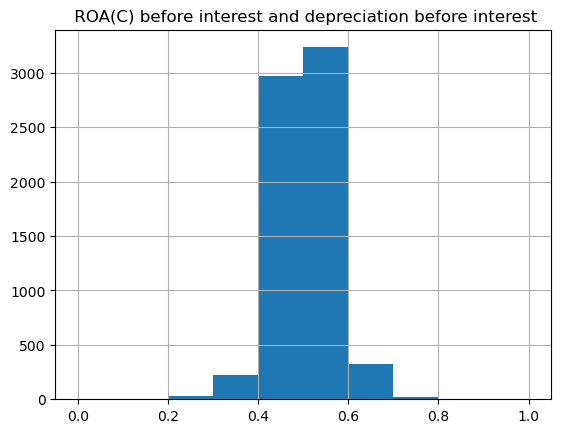

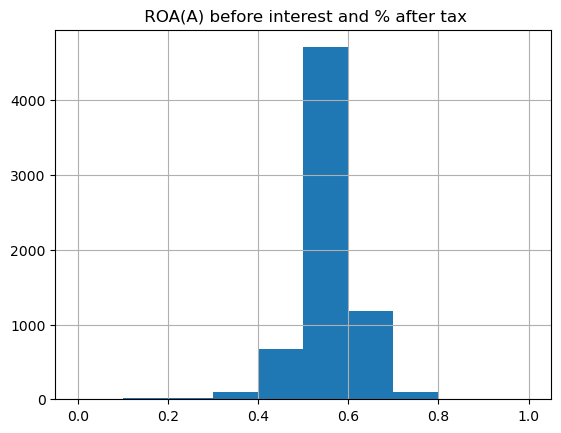

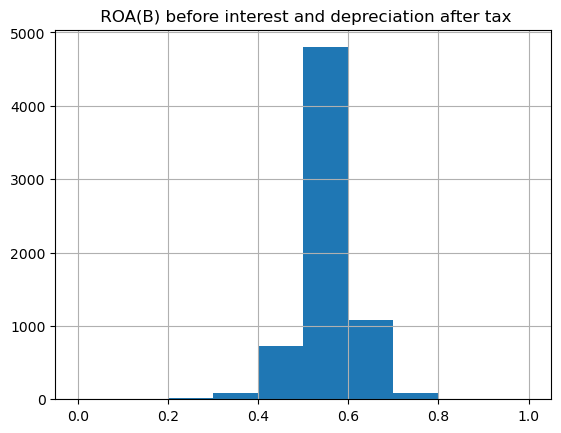

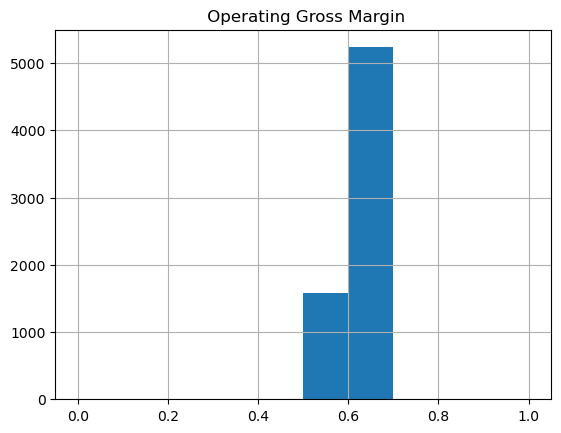

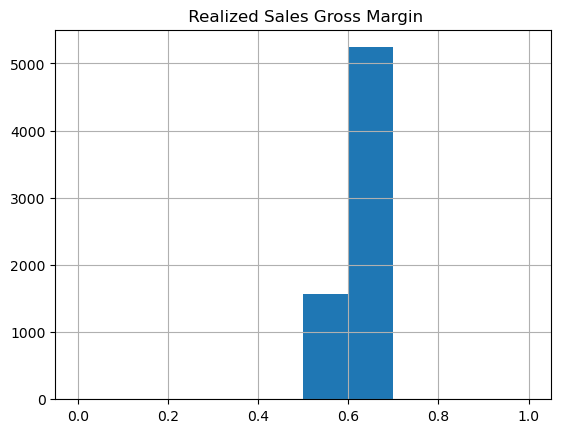

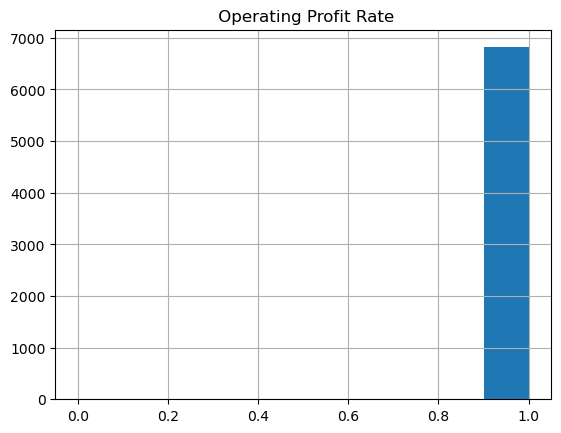

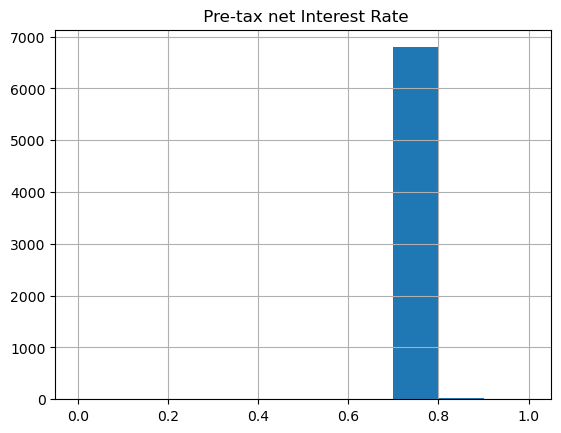

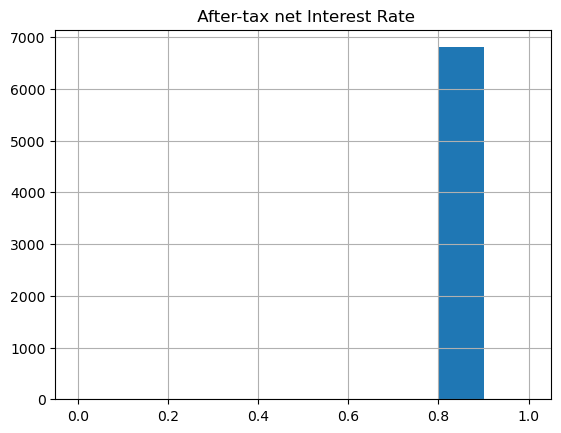

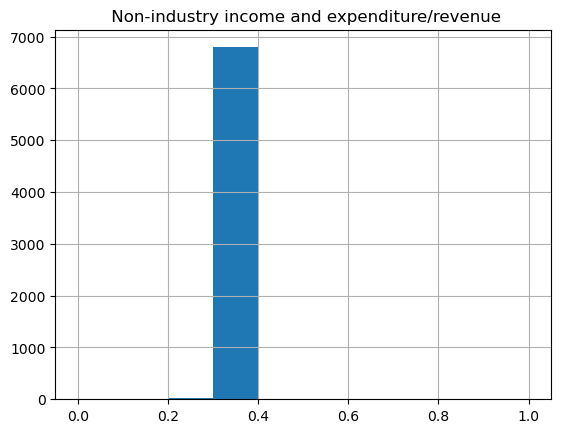

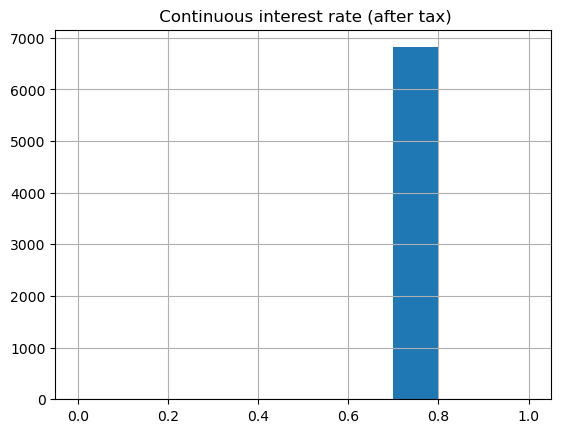

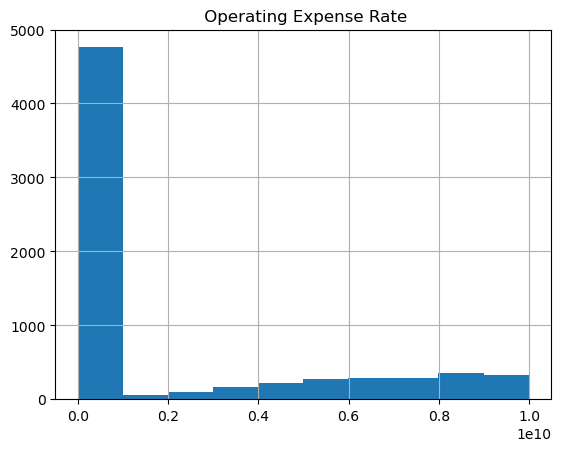

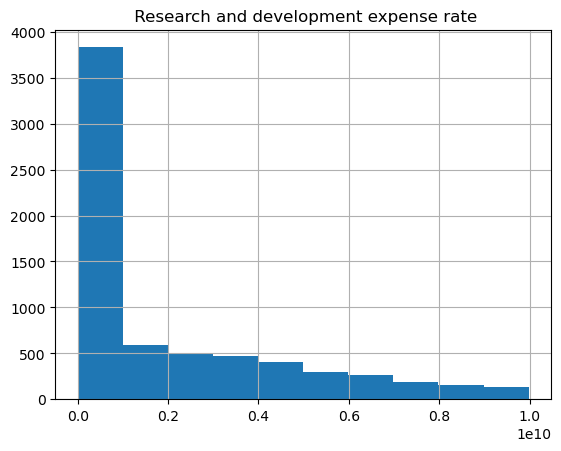

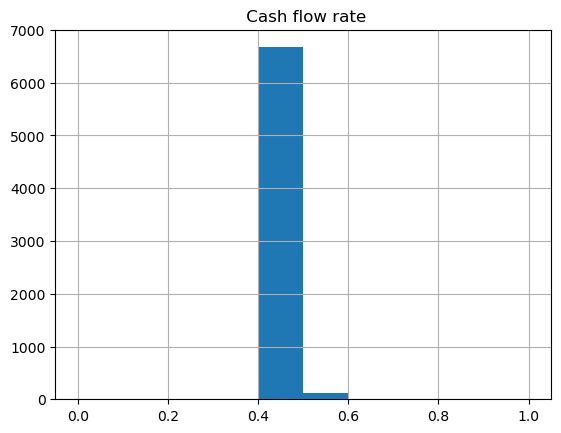

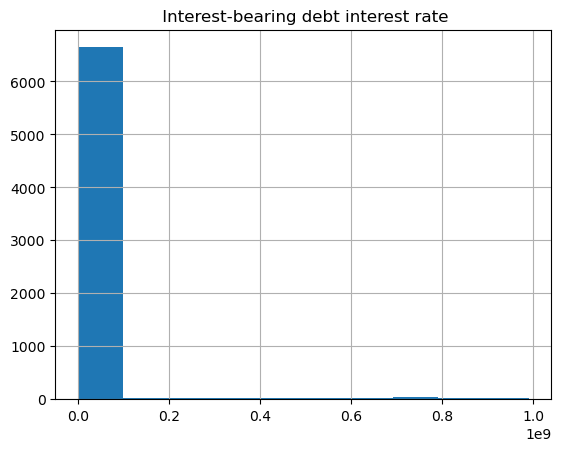

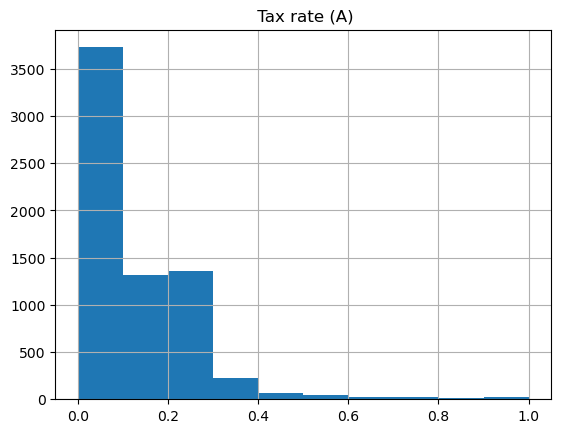

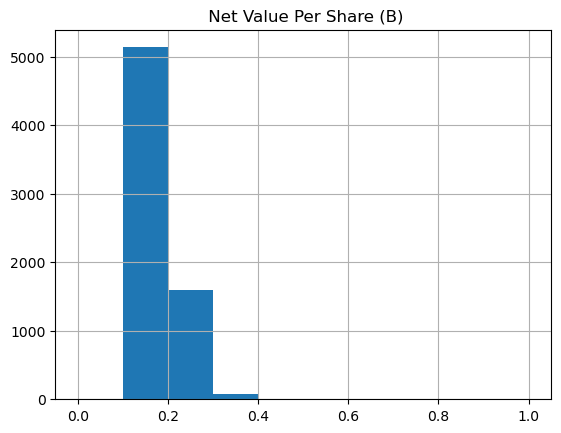

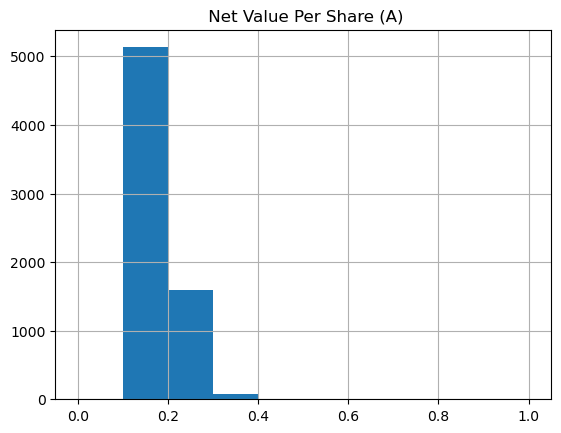

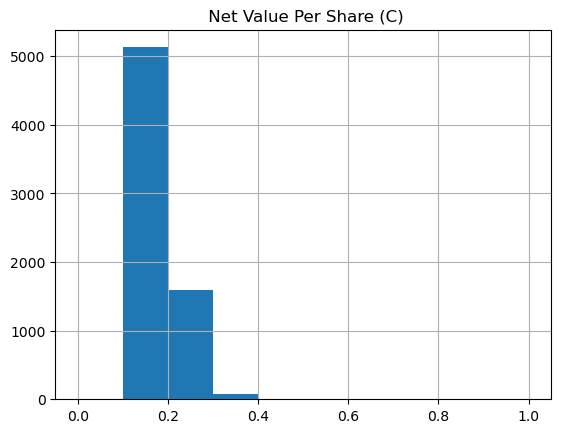

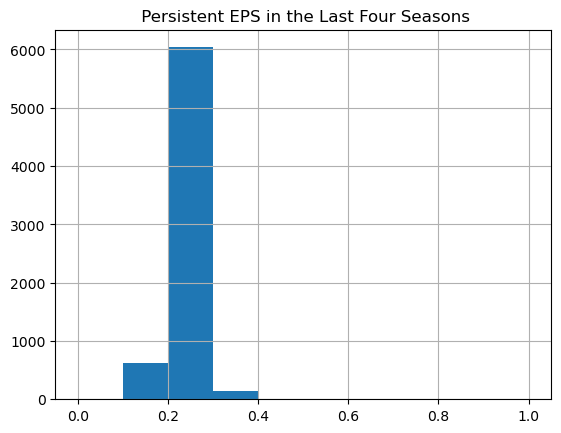

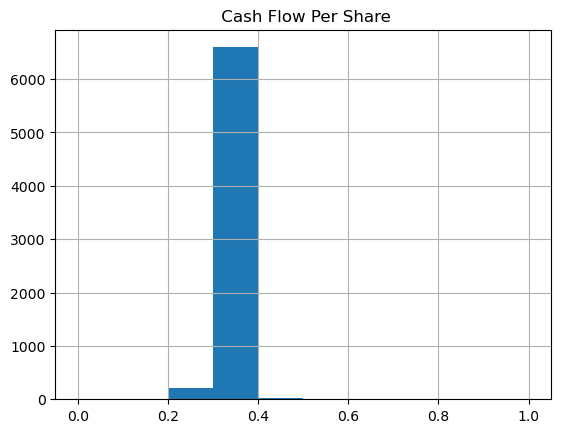

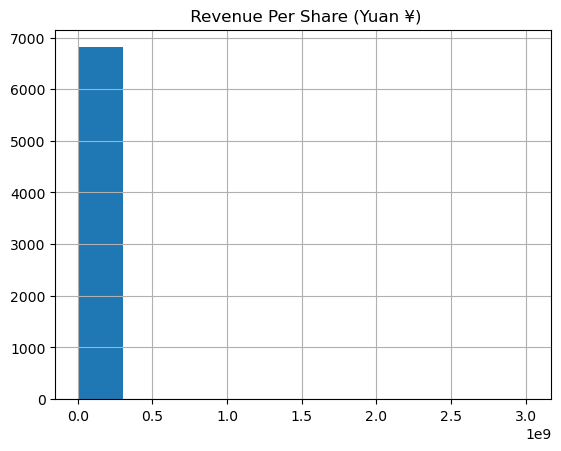

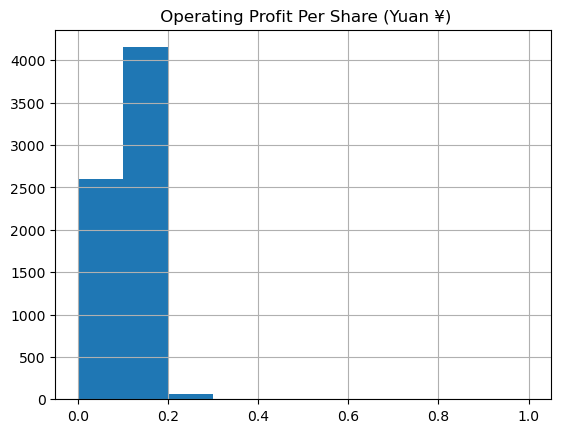

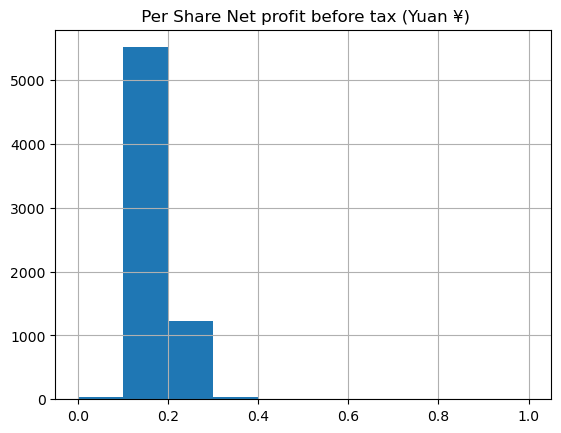

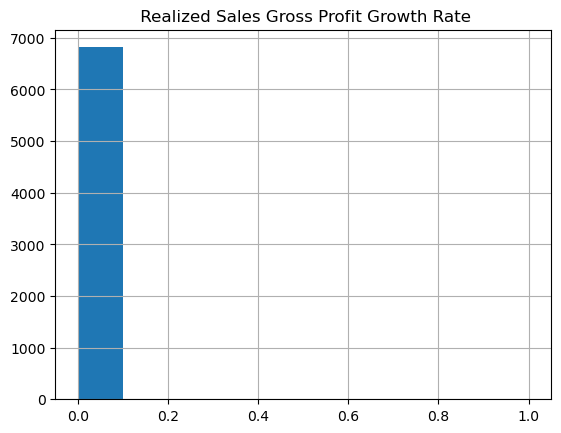

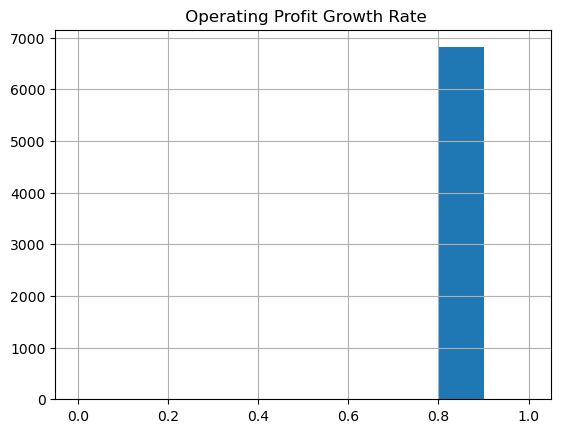

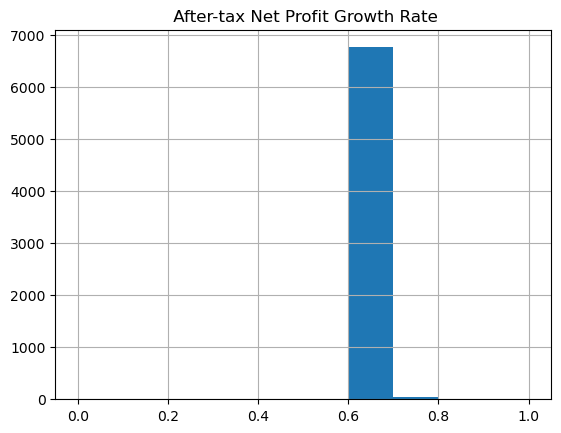

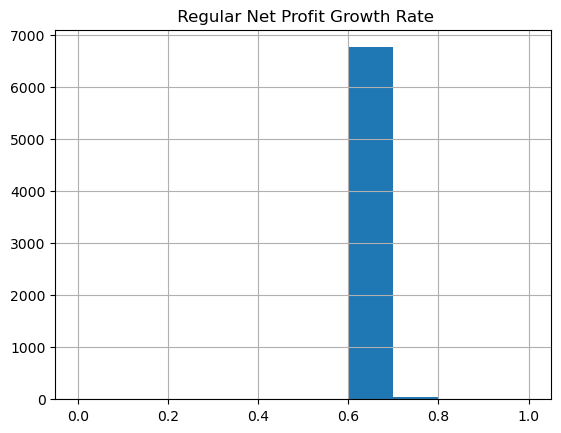

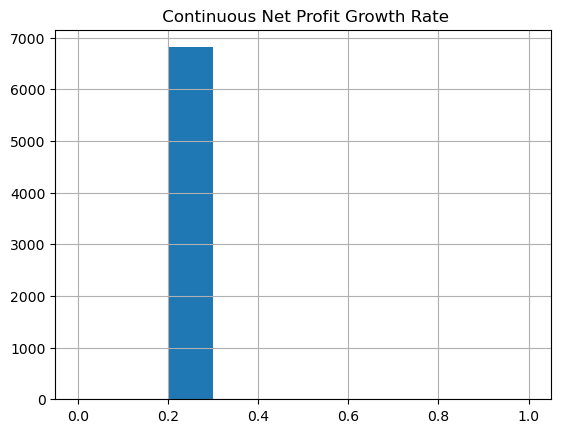

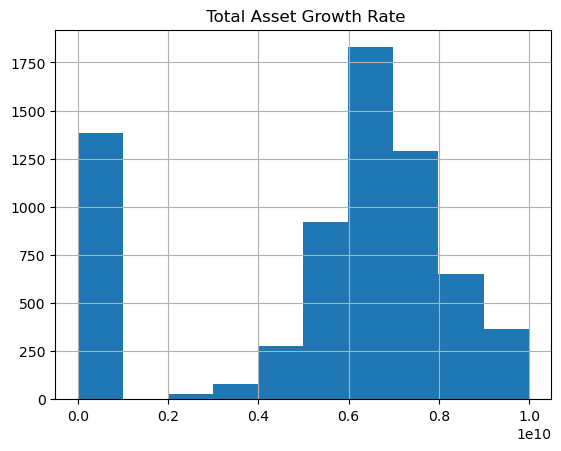

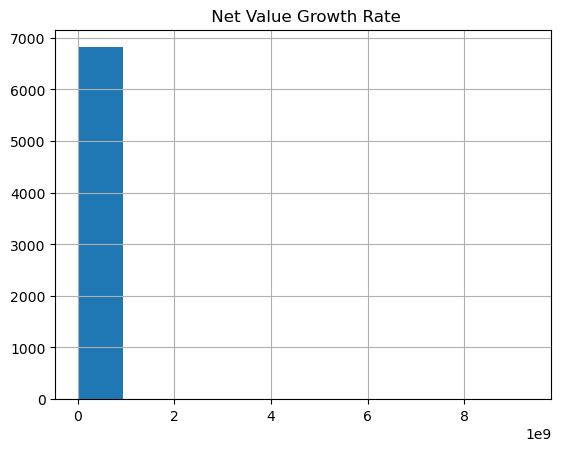

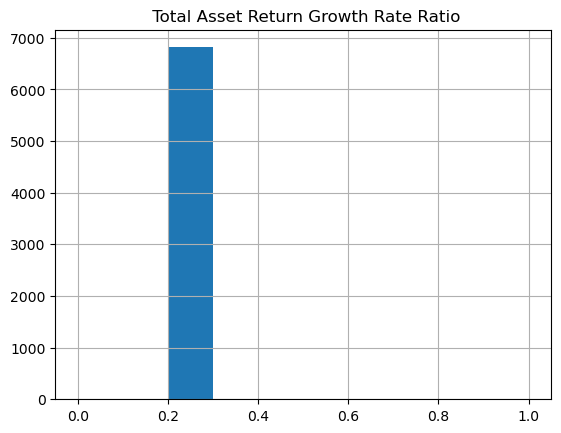

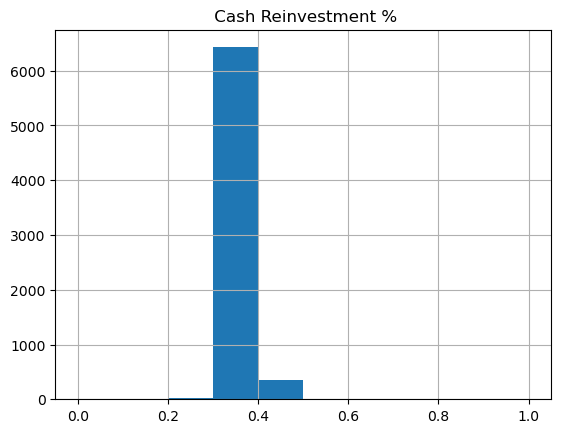

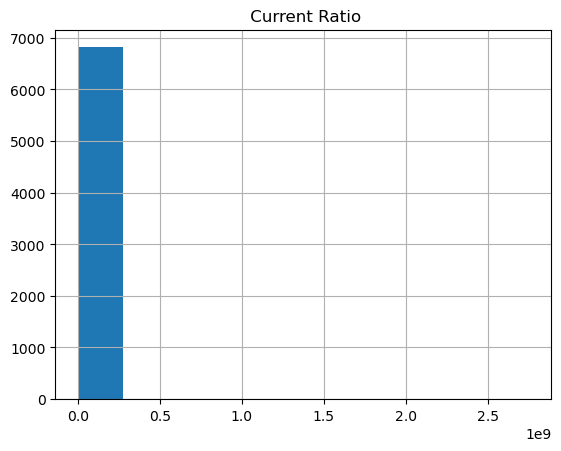

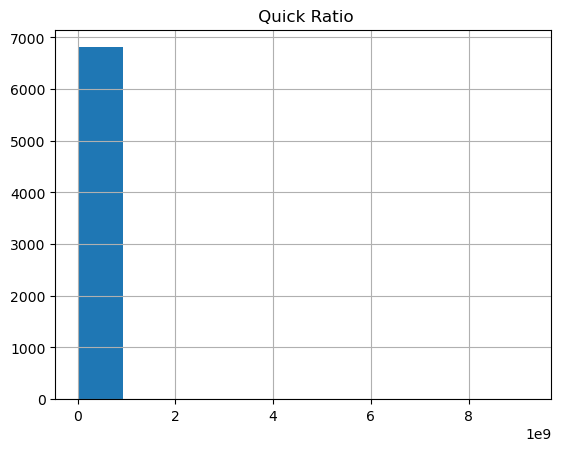

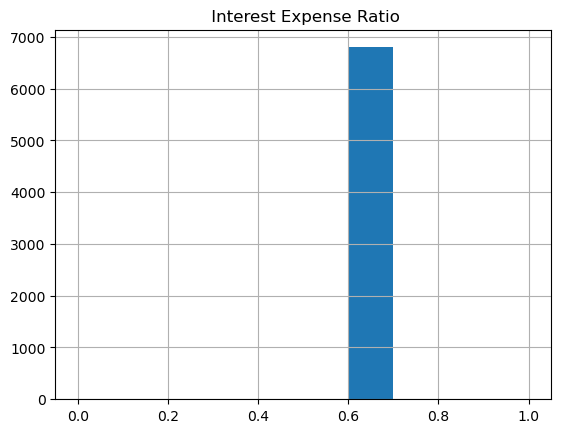

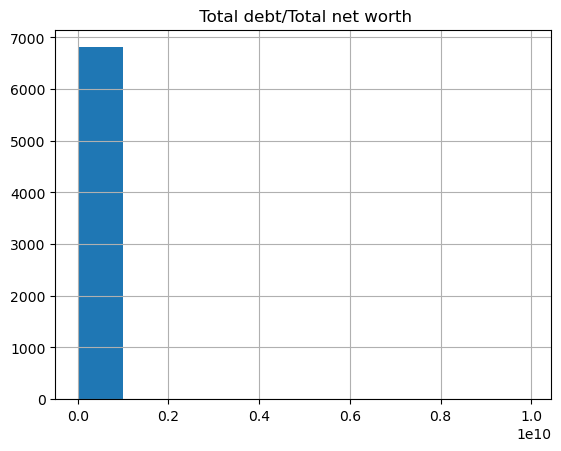

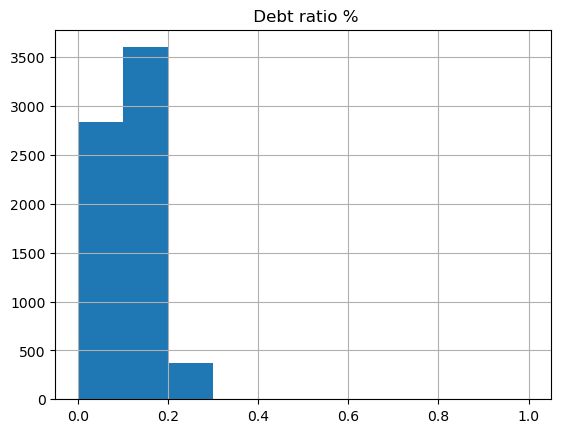

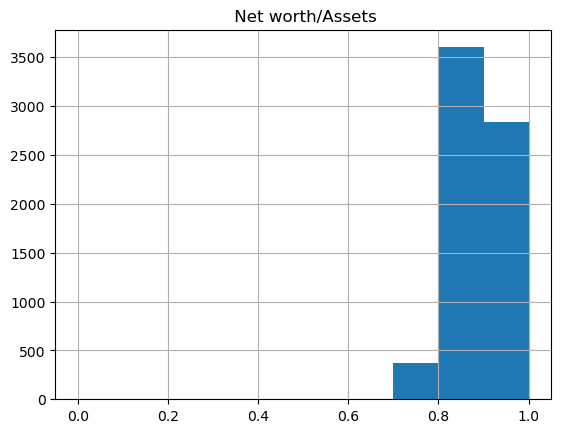

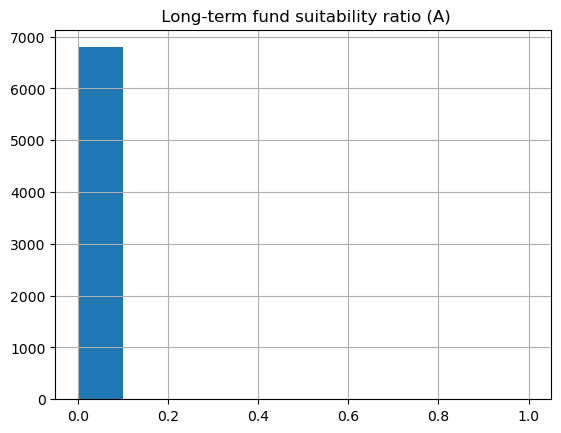

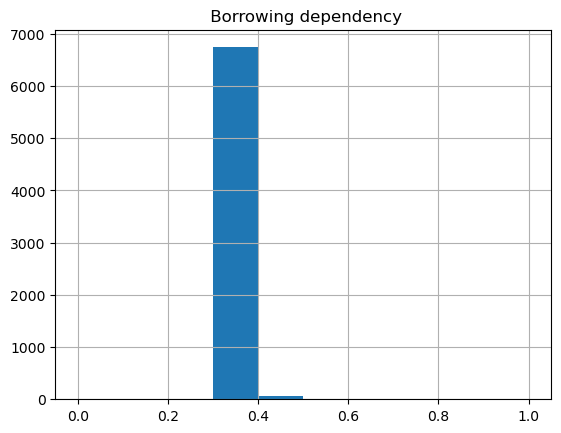

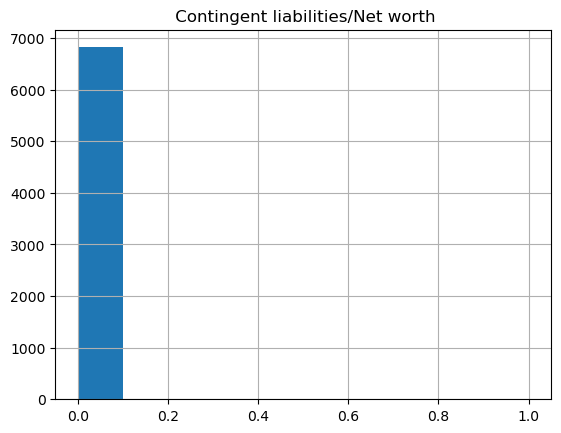

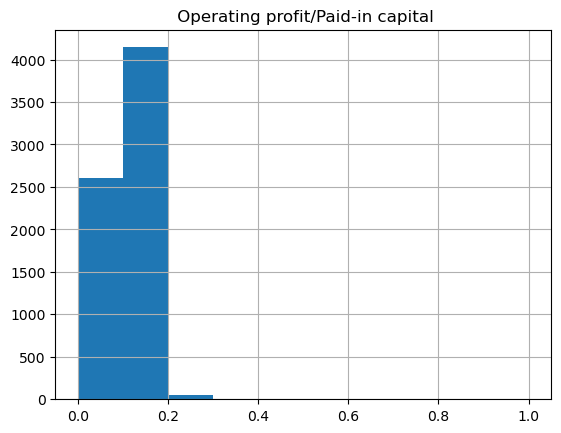

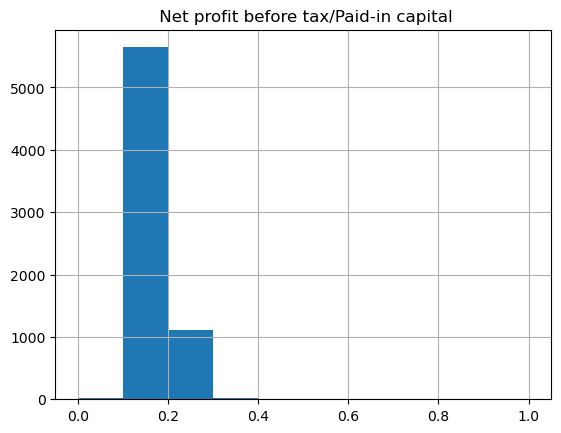

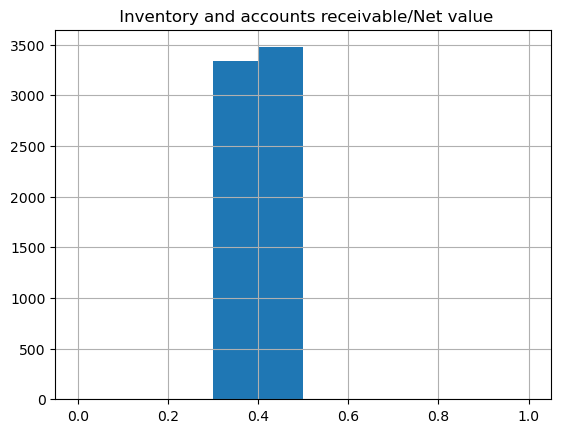

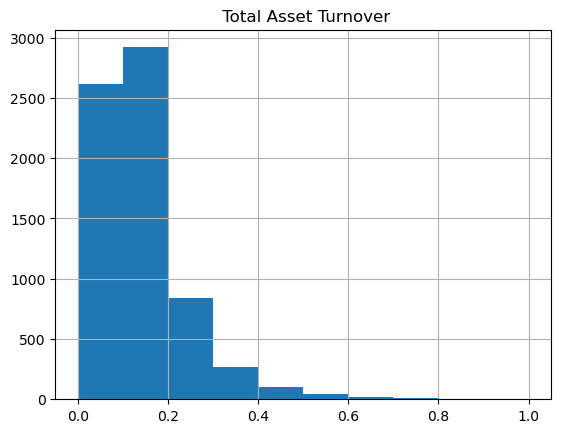

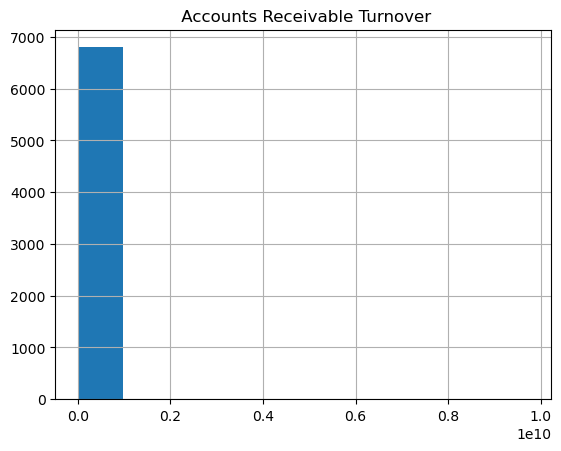

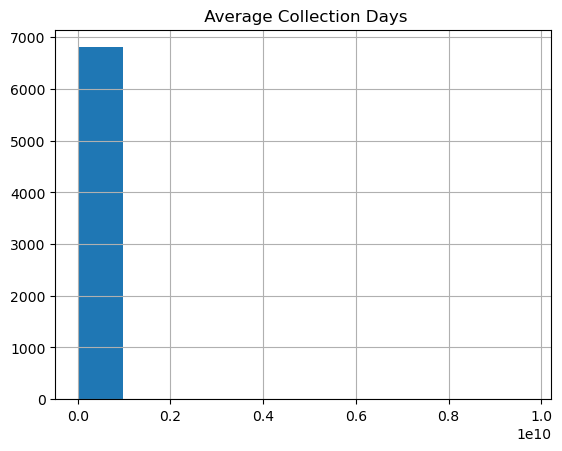

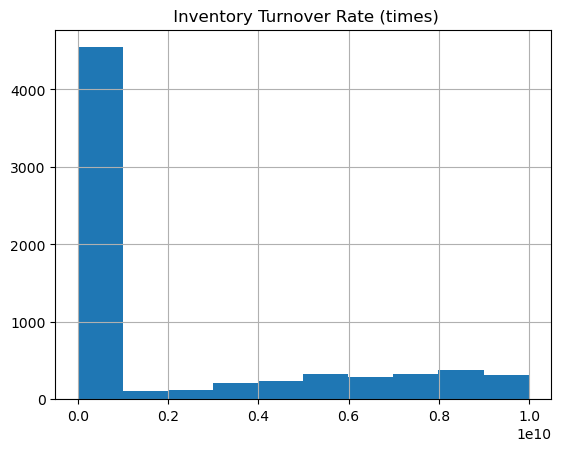

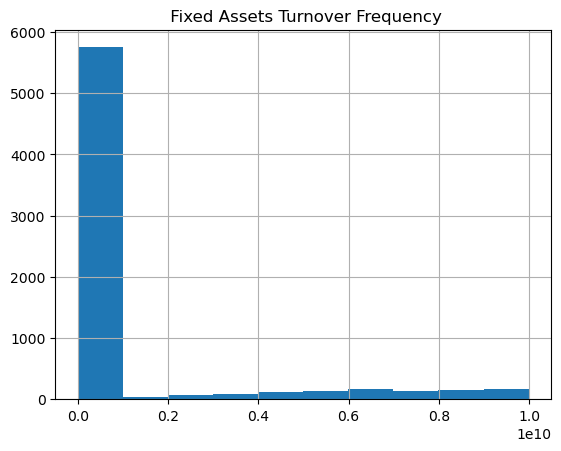

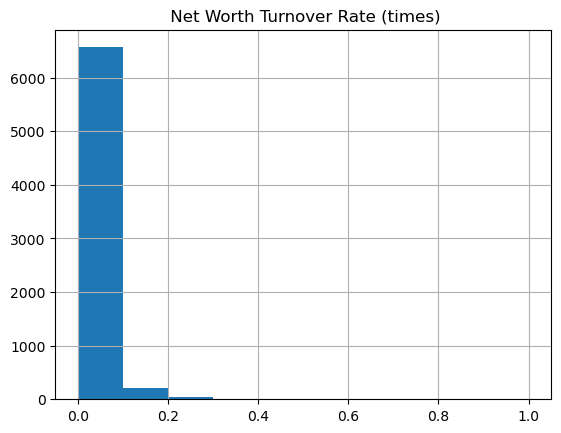

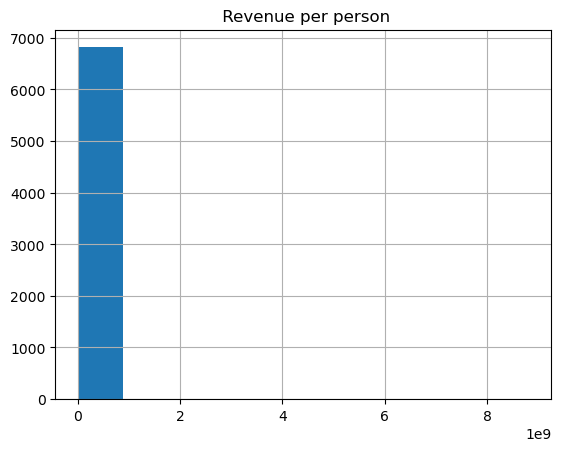

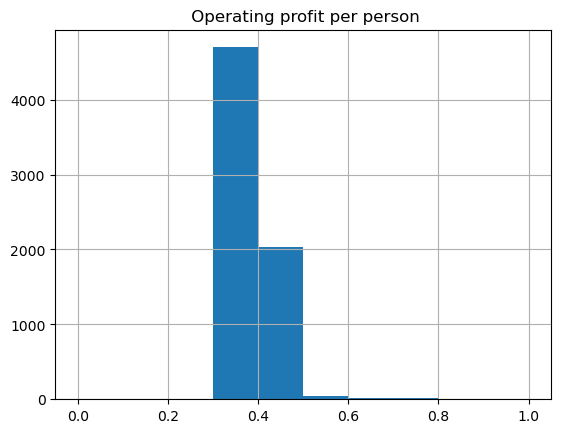

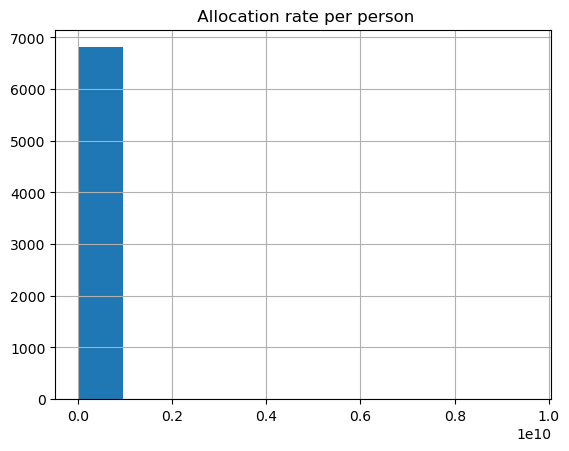

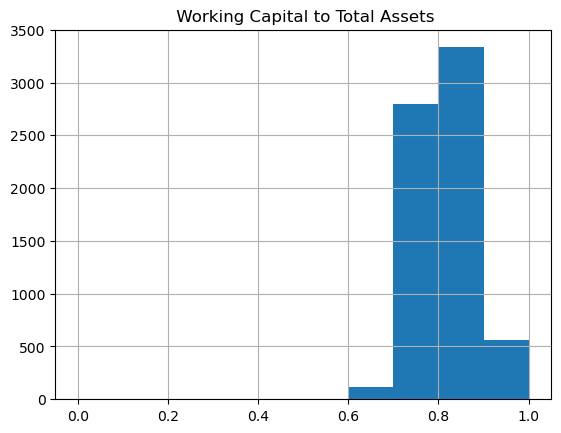

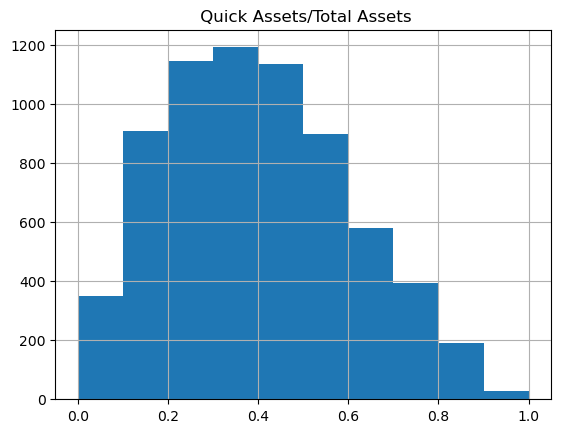

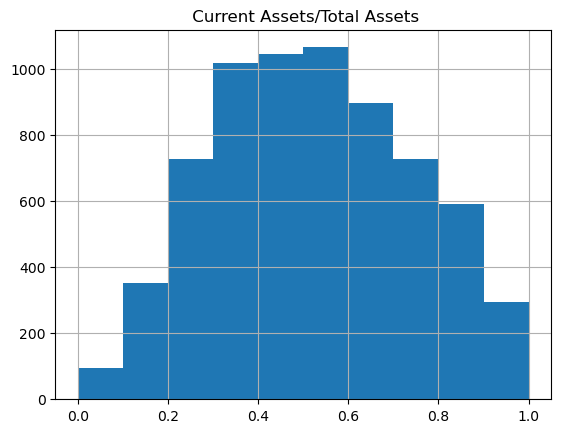

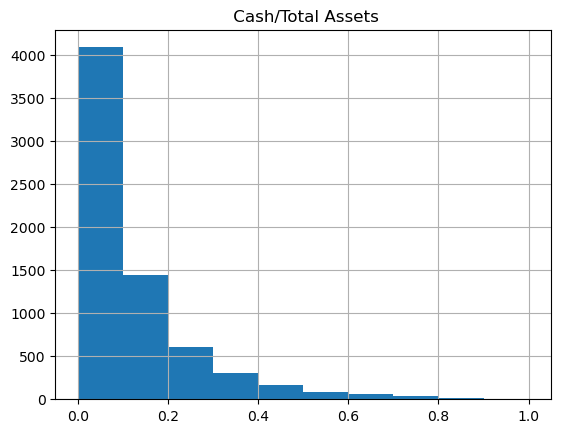

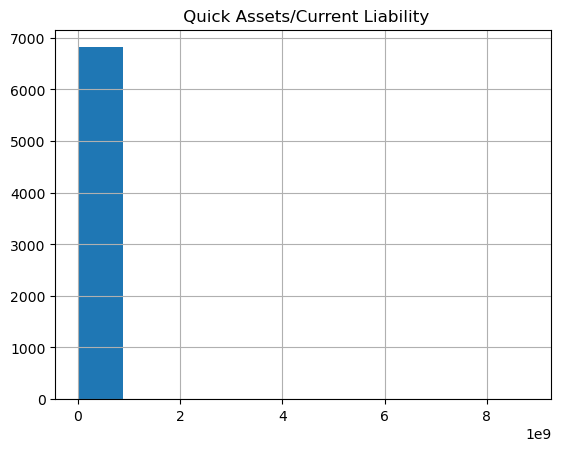

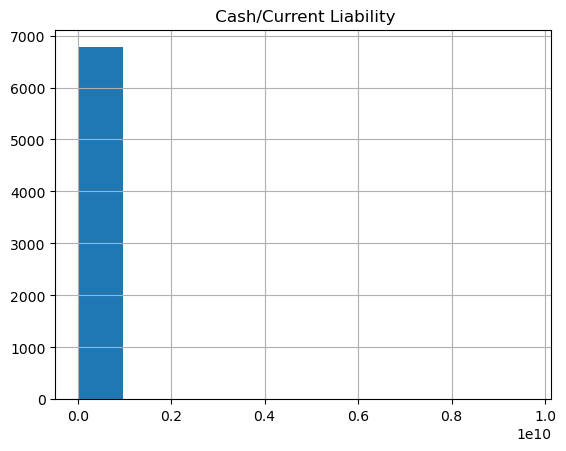

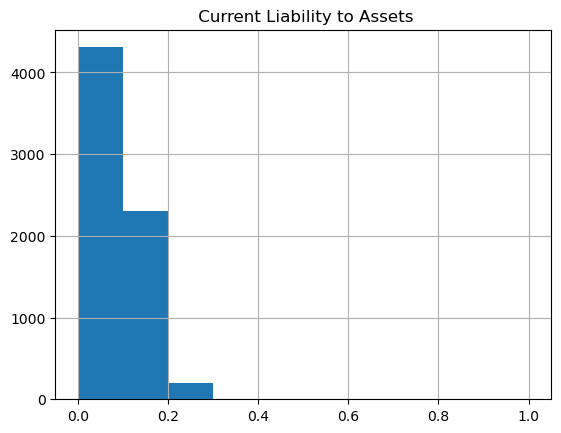

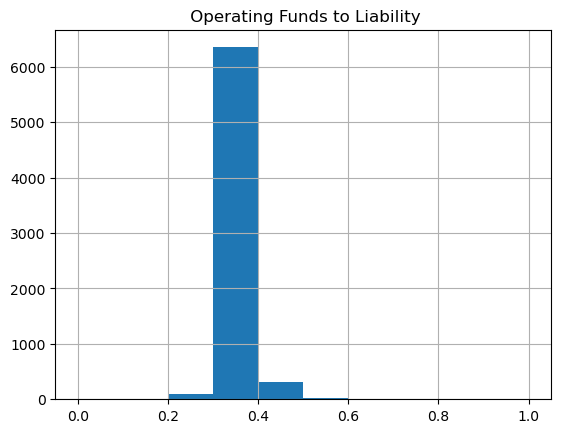

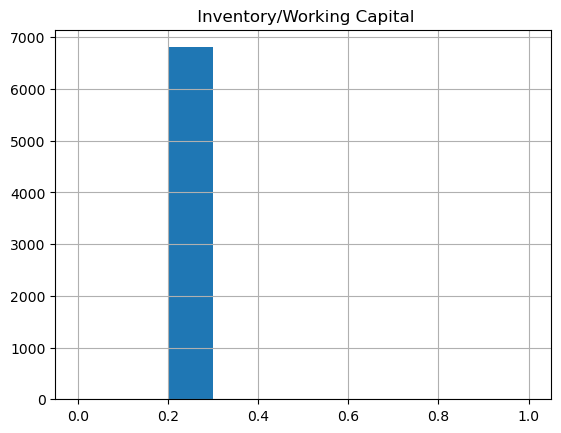

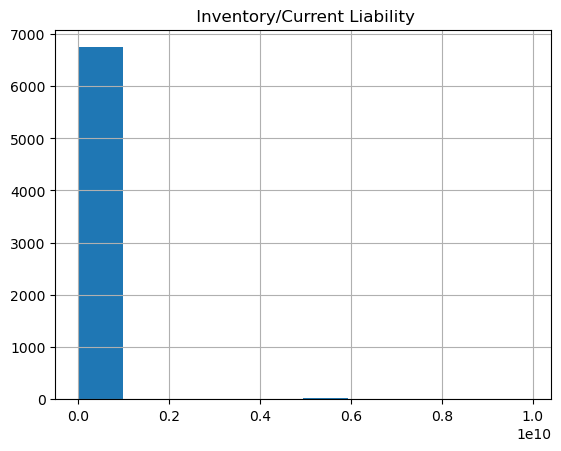

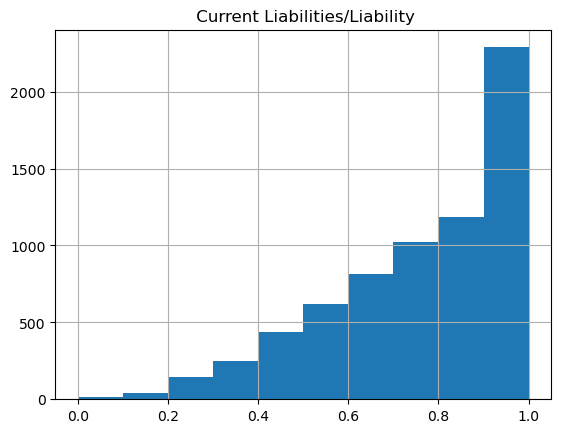

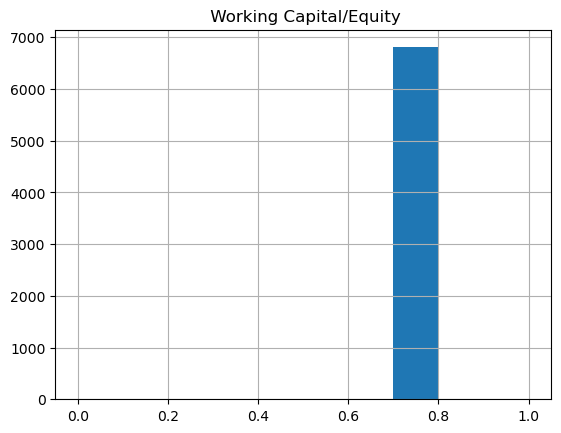

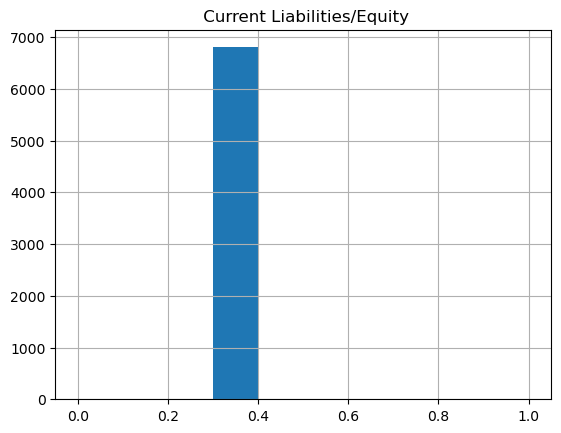

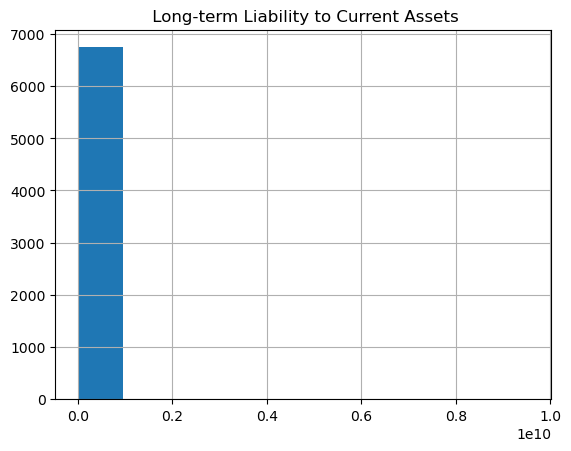

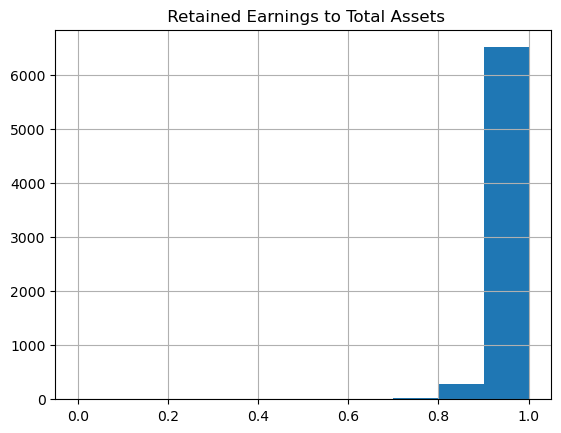

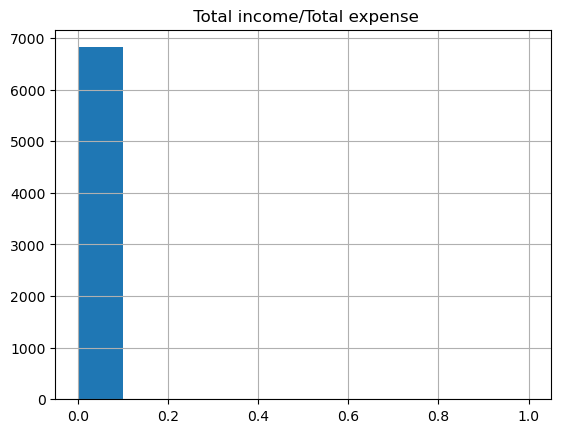

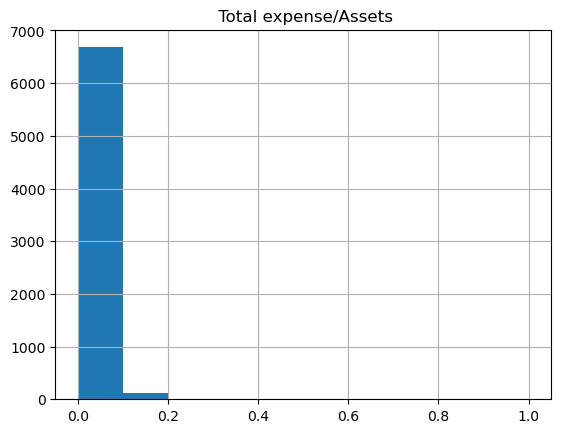

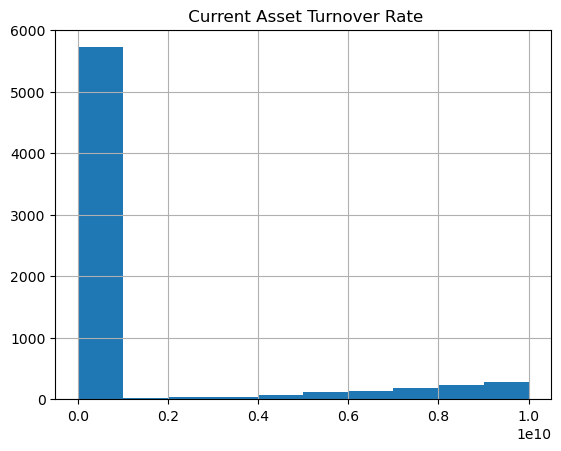

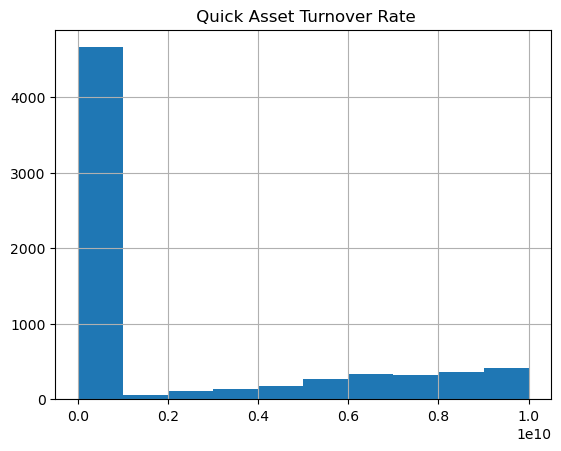

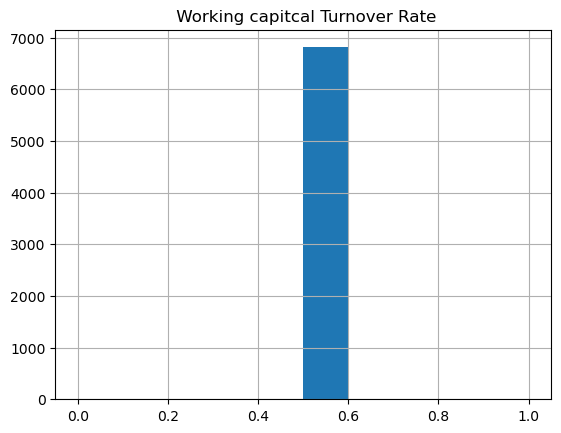

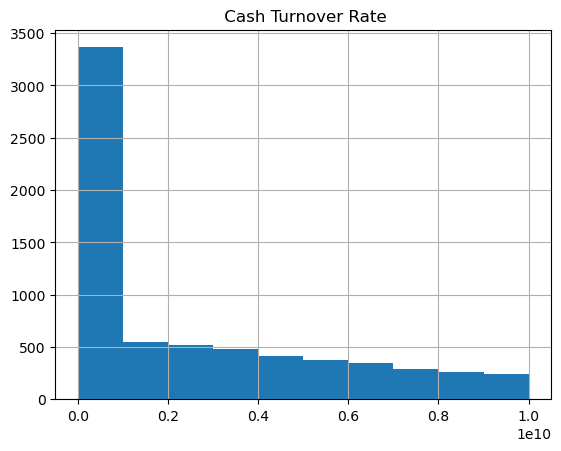

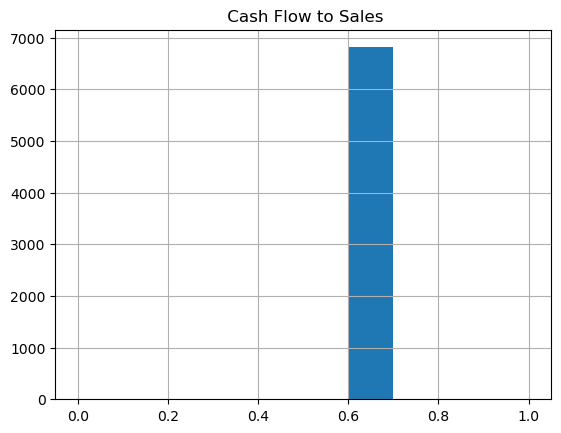

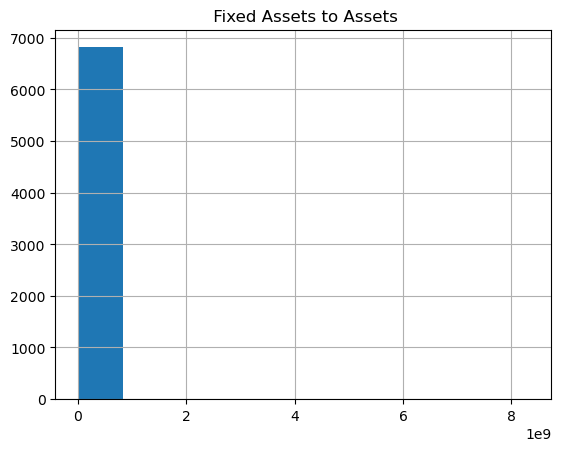

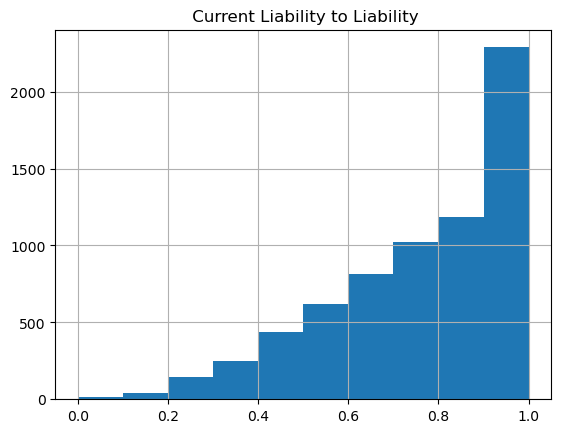

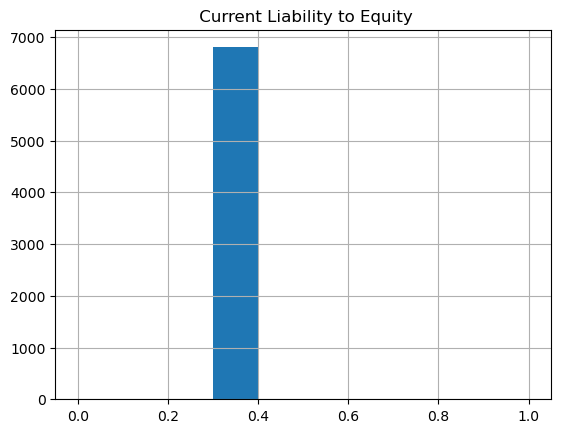

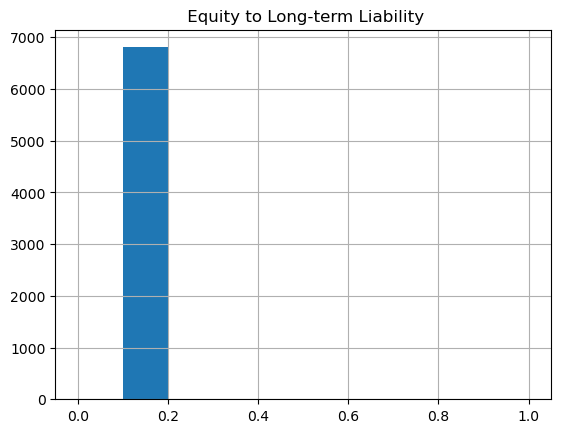

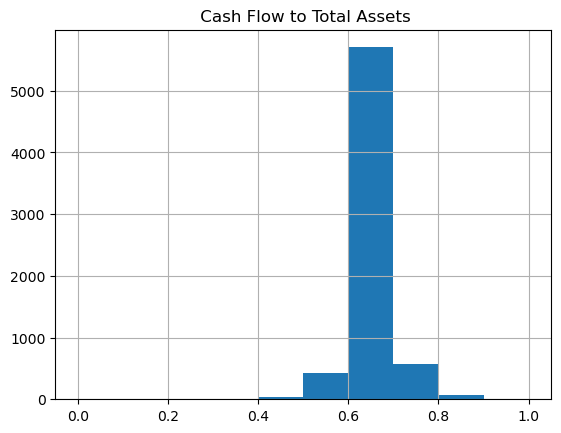

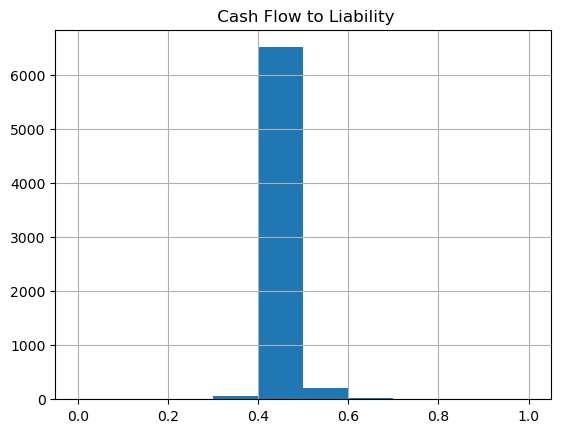

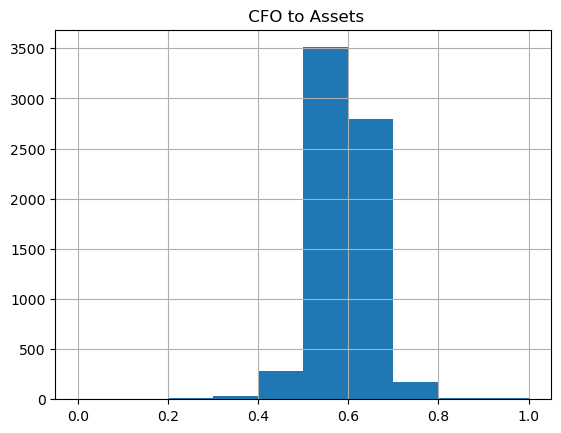

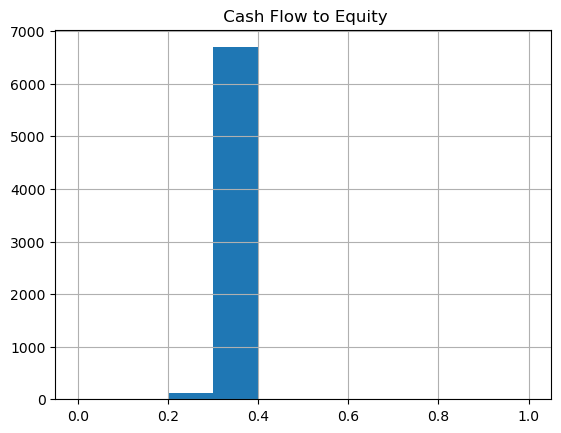

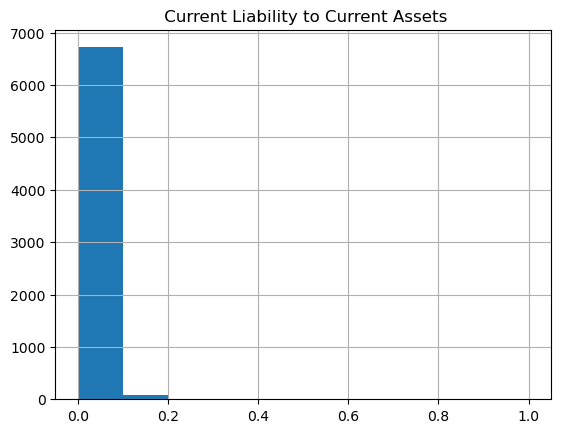

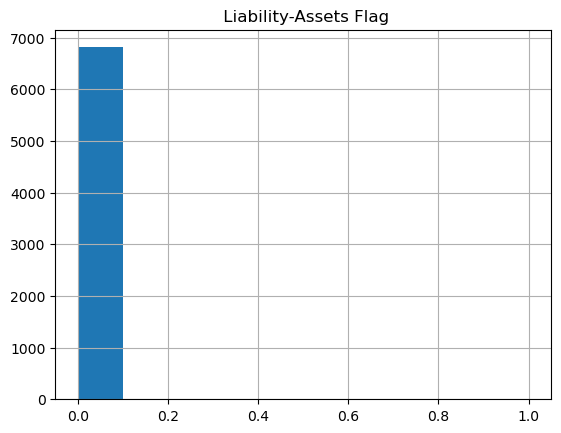

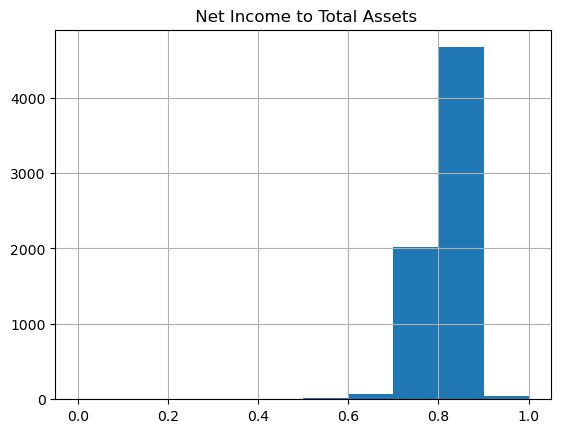

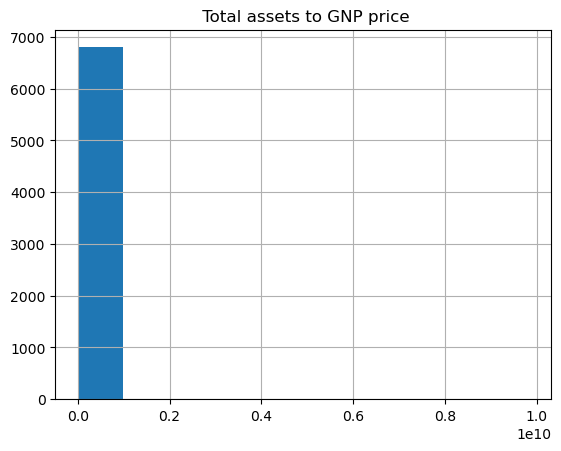

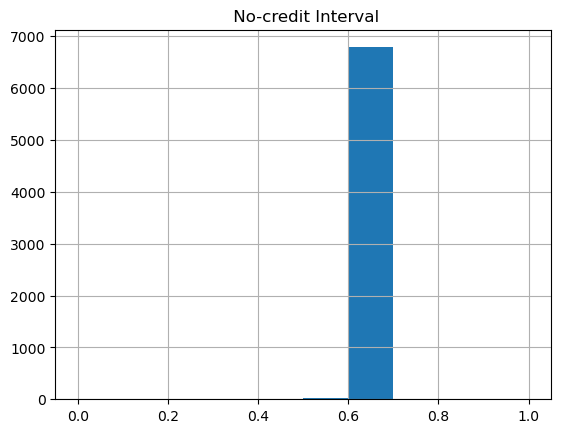

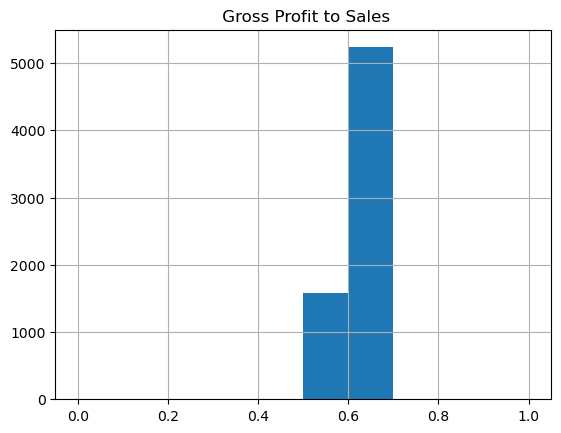

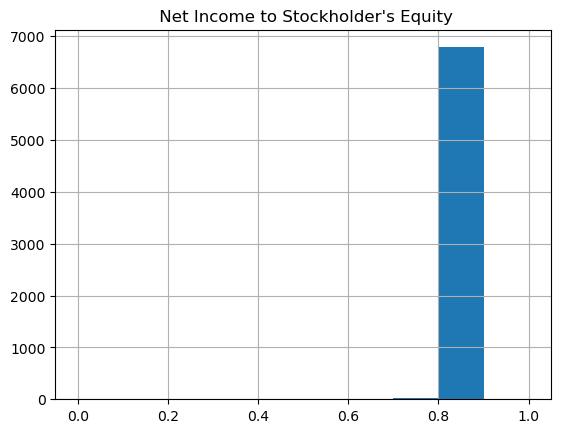

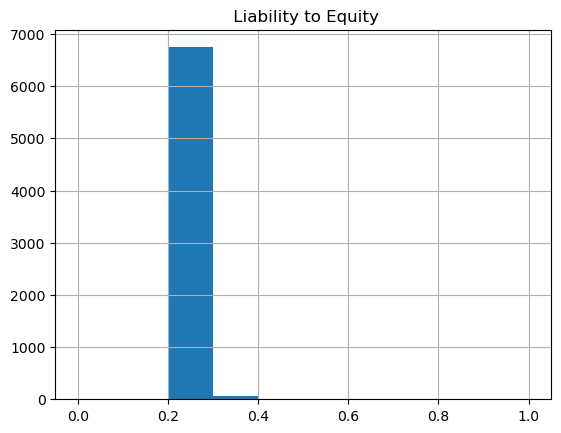

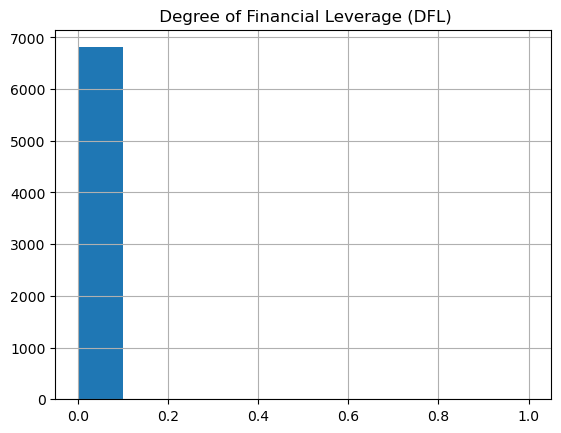

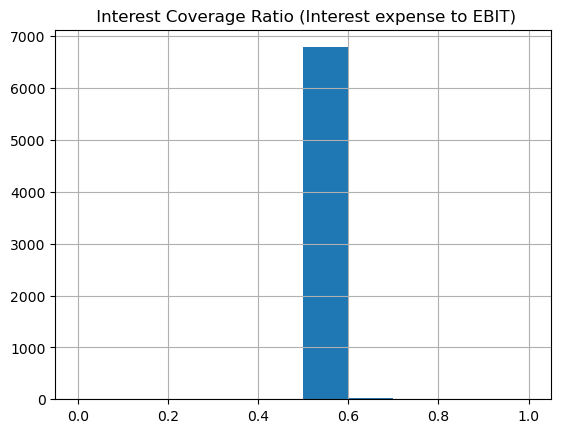

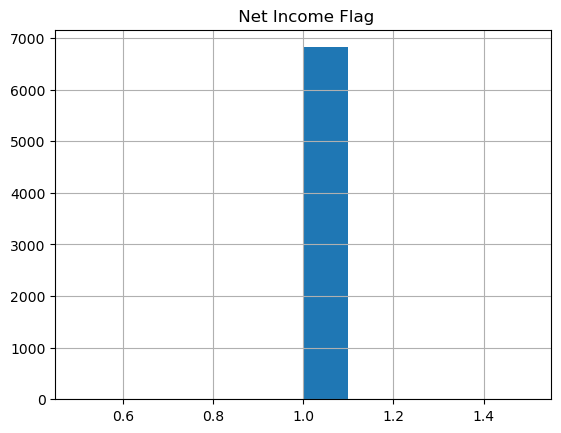

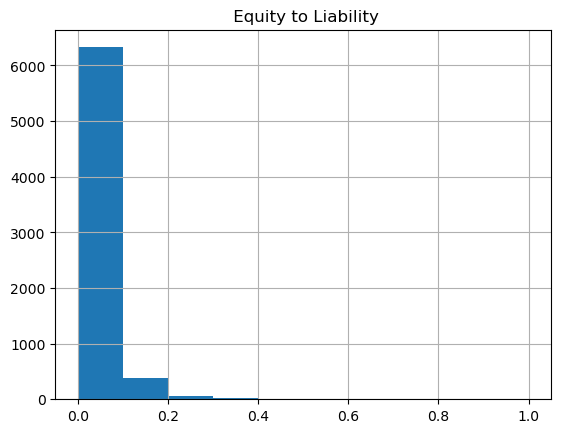

In [7]:
# много нединамичных признаков
for i in data.columns:
    data[i].hist()
    plt.title(f'{i}')
    plt.show()

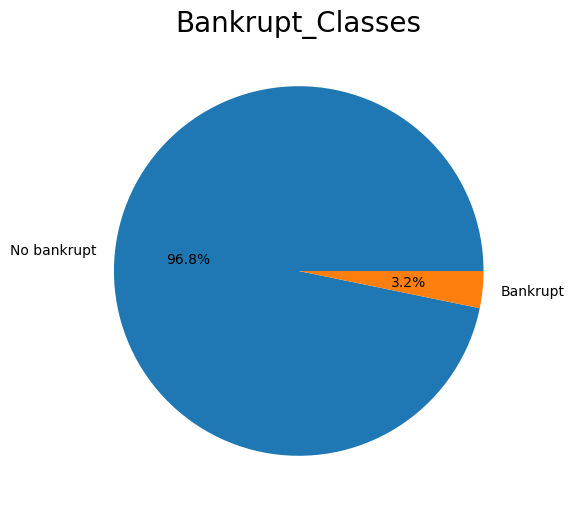

In [8]:
# Оценим дисбаланс классов
plt.figure(figsize=(10,6))
plt.pie(x=target.value_counts(), labels=['No bankrupt', 'Bankrupt'], autopct='%1.1f%%')
plt.title('Bankrupt_Classes',fontsize=20)
plt.show()

##### Дисбаланс классов существенный, что позволяет сразу отбросить метод KNN 

##### Чистим выбросы

In [9]:
not_rate_features = []
for i in data.columns:
    if max(data.loc[:, i]) > 1 or min(data.loc[:, i]) < -1:
        not_rate_features.append(i)
print(len(not_rate_features))
not_rate_features

24


[' Operating Expense Rate',
 ' Research and development expense rate',
 ' Interest-bearing debt interest rate',
 ' Revenue Per Share (Yuan ¥)',
 ' Total Asset Growth Rate',
 ' Net Value Growth Rate',
 ' Current Ratio',
 ' Quick Ratio',
 ' Total debt/Total net worth',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Revenue per person',
 ' Allocation rate per person',
 ' Quick Assets/Current Liability',
 ' Cash/Current Liability',
 ' Inventory/Current Liability',
 ' Long-term Liability to Current Assets',
 ' Current Asset Turnover Rate',
 ' Quick Asset Turnover Rate',
 ' Cash Turnover Rate',
 ' Fixed Assets to Assets',
 ' Total assets to GNP price']

In [10]:
for i in not_rate_features:
    print(f'Название признака = {i}',
          f'Максимальное значение признака = {data[i].max()}', 
          f'Первая квартиль = {data[i].quantile(0.25)}', 
          f'Медиана = {data[i].quantile(0.5)}', 
          f'Третья квартиль = {data[i].quantile(0.75)}', 
          f'Стандартное отклонение = {data[i].std()}', sep='\n', end = '\n'*3)

Название признака =  Operating Expense Rate
Максимальное значение признака = 9990000000.0
Первая квартиль = 0.0001566874492428
Медиана = 0.0002777588583625
Третья квартиль = 4145000000.0
Стандартное отклонение = 3237683890.522487


Название признака =  Research and development expense rate
Максимальное значение признака = 9980000000.0
Первая квартиль = 0.000128187953762
Медиана = 509000000.0
Третья квартиль = 3450000000.0
Стандартное отклонение = 2598291553.9983416


Название признака =  Interest-bearing debt interest rate
Максимальное значение признака = 990000000.0
Первая квартиль = 0.0002030203020302
Медиана = 0.0003210321032103
Третья квартиль = 0.0005325532553255
Стандартное отклонение = 108275033.5328233


Название признака =  Revenue Per Share (Yuan ¥)
Максимальное значение признака = 3020000000.0
Первая квартиль = 0.01563138073415305
Медиана = 0.0273757127516373
Третья квартиль = 0.0463572152396509
Стандартное отклонение = 51707089.76790668


Название признака =  Total Asset Gr

##### Как можно заметить, большая часть признаков поддается ограничению выбросов с помощью интерквартильного размаха. Впоследствии датасет будет нормализован, что уменьшит влияние оставшихся поврежденных признаков

In [11]:
def cut_outliers_IQR(clmn, N=1.5):
    Q1 = clmn.quantile(0.25)
    Q3 = clmn.quantile(0.75)
    IQR = Q3 - Q1
    Lim_max = Q3 + IQR*N
    Lim_min = Q1 - IQR*N
    
    def cutting(x):
        if x > Lim_max:
            x = Lim_max
        elif x < Lim_min:
            x = Lim_min
        return x
    clmn_new = clmn.apply(cutting)
    return clmn_new

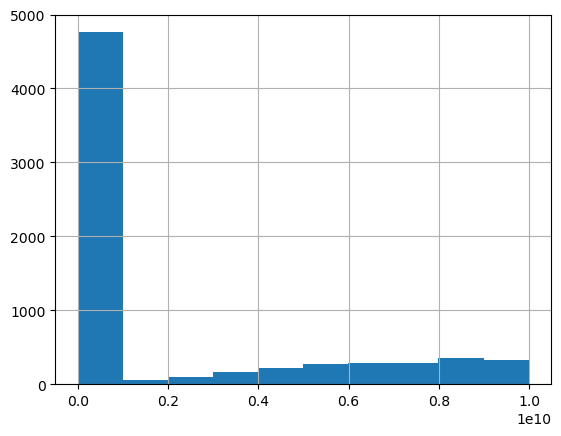

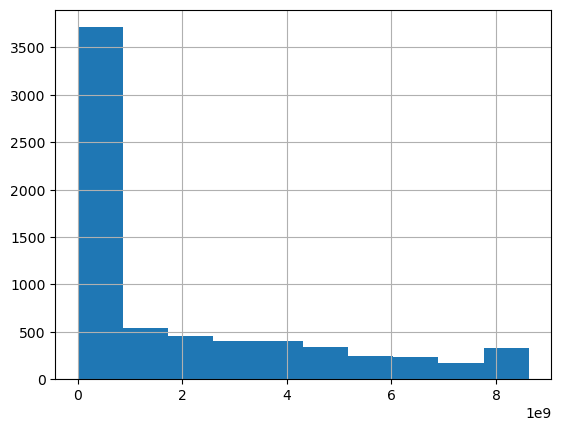

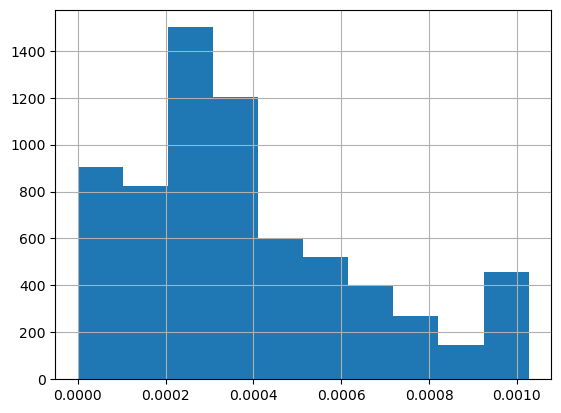

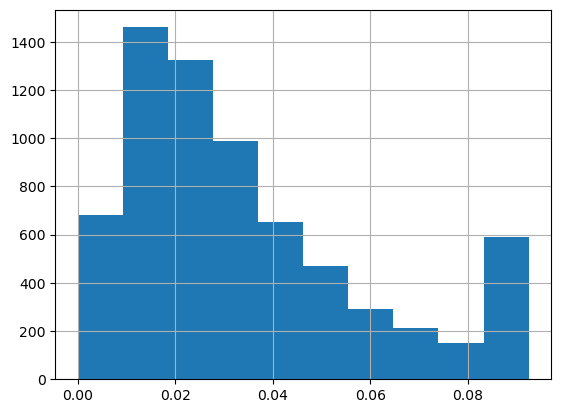

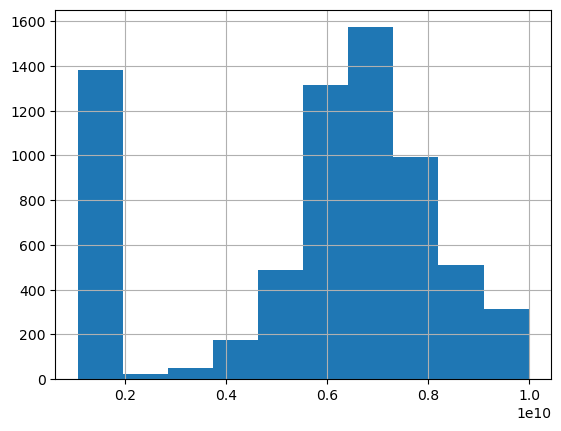

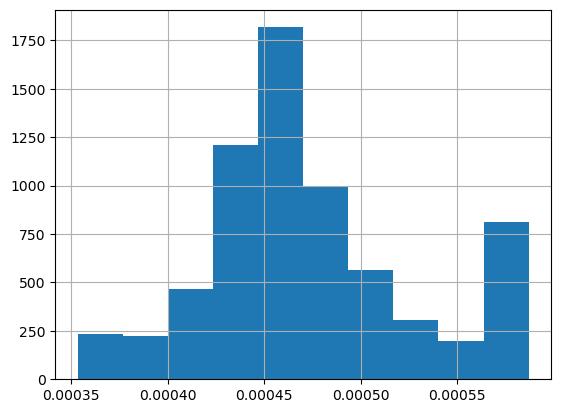

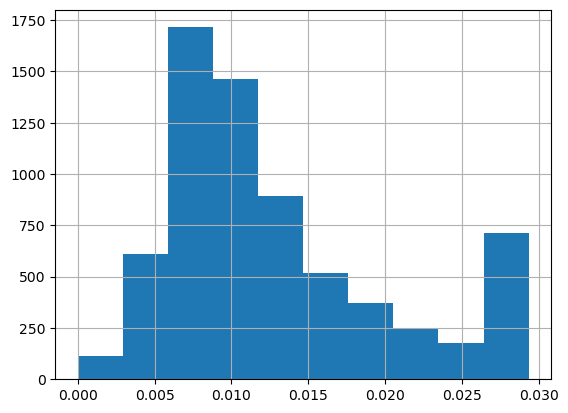

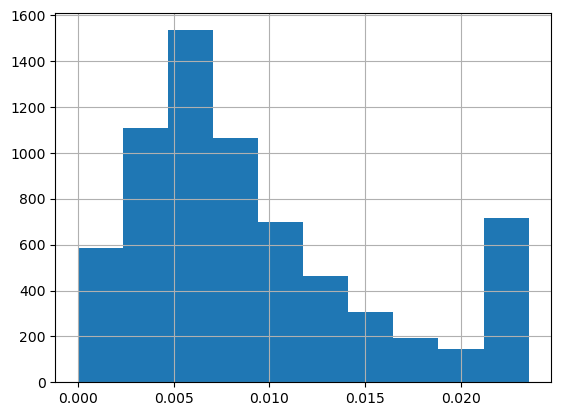

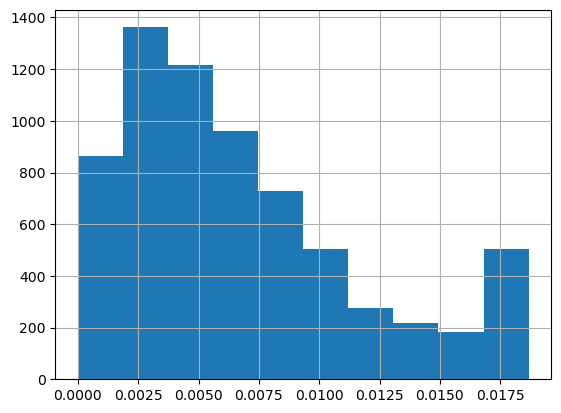

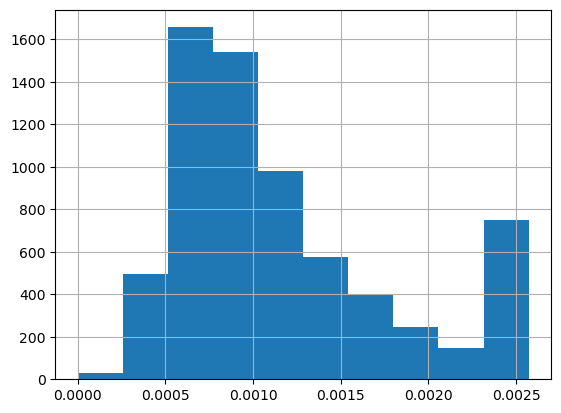

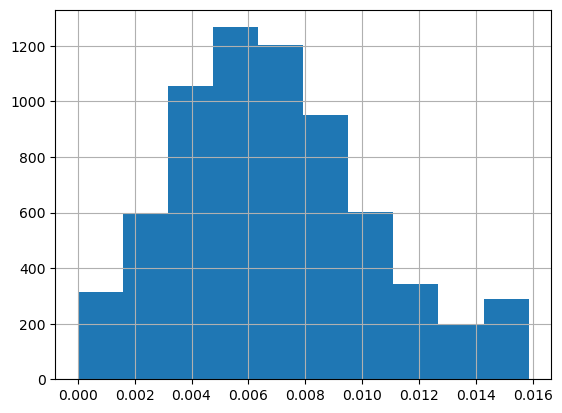

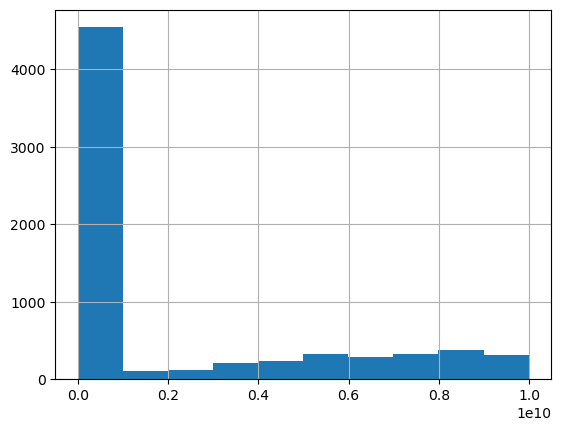

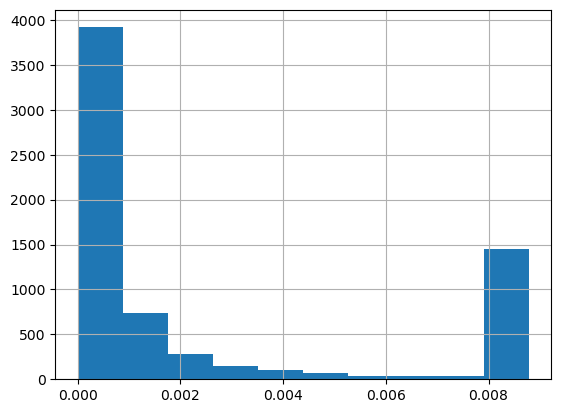

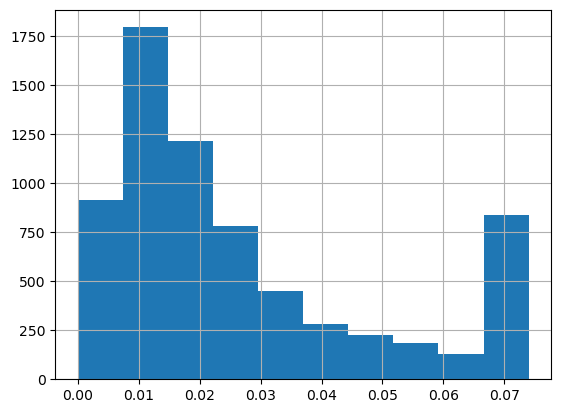

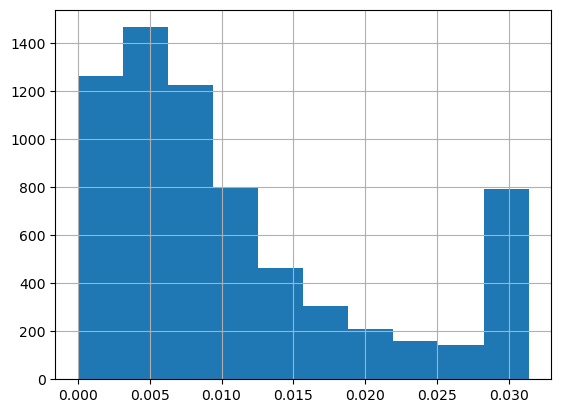

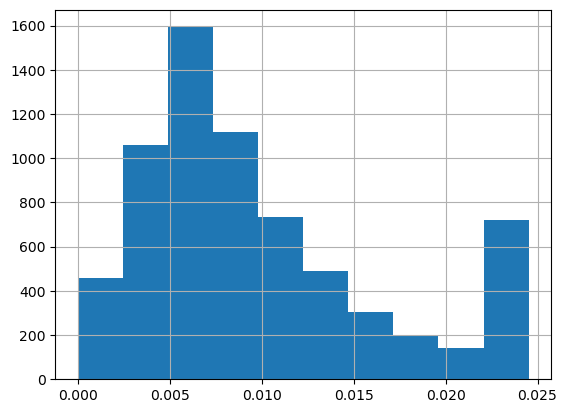

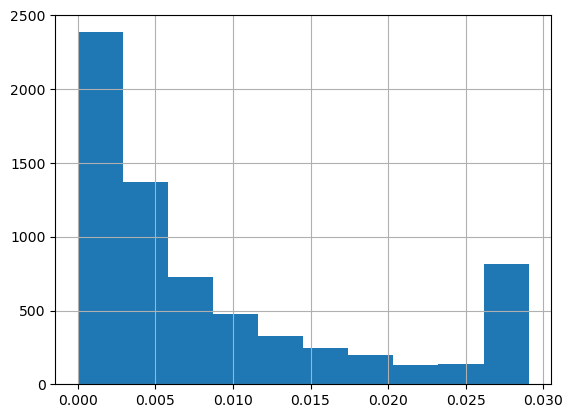

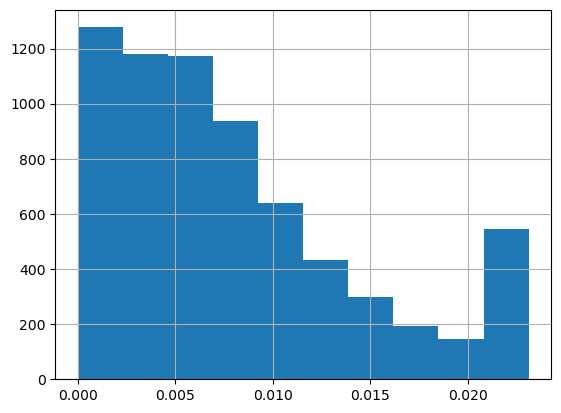

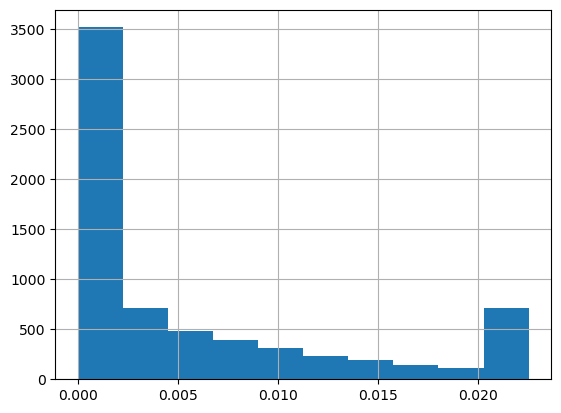

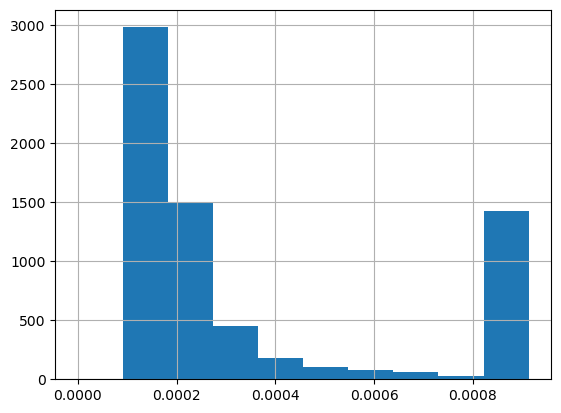

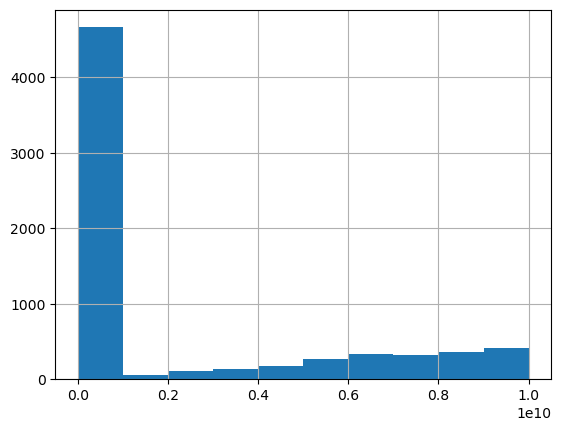

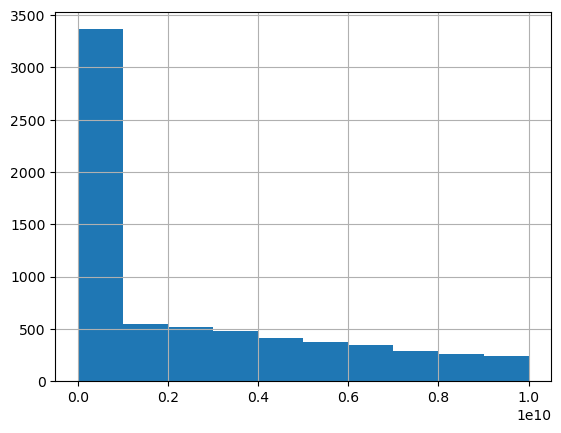

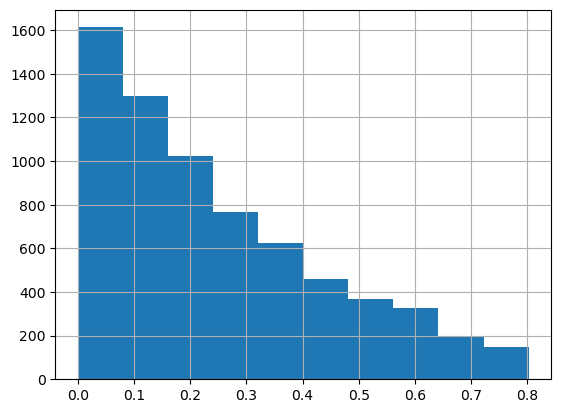

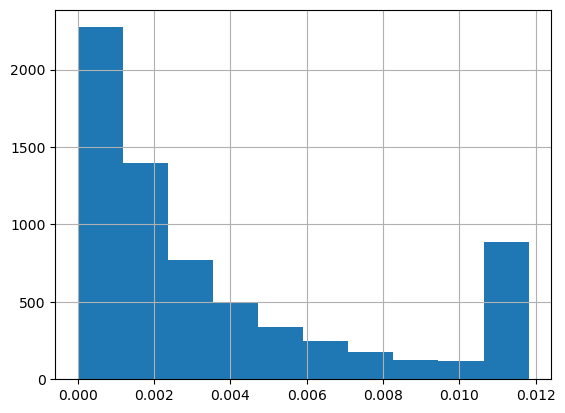

In [12]:
for fix in not_rate_features:
    data[fix] = cut_outliers_IQR(data[fix])
    data[fix].hist()
    plt.show()

##### Далее классификация будет производиться двумя алгоритмами: логистической регрессией и случайным лесом

### Logistic Regression

##### Логистическая регрессия чувствительна к масштабу. Стандартизация не поможет свести данные к схожему масштабу, так как разница в диапахонах слишком велика. Поэтому применим нормализацию алгоритмом MinMax

In [13]:
scaler = MinMaxScaler()
data_LR = data.copy(deep=True)
data_LR = scaler.fit_transform(data_LR)
data_LR = pd.DataFrame(data_LR, columns=data.columns)

In [14]:
data_LR.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.780052,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.0,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.704230,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.0,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,1.000000,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.0,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.275190,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.0,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.328078,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.0,0.035490


##### Так как классы сильно несбалансированы, мы применим алгоритм сэмплинга :  сначала - стратифицированный сэпмлинг для сохранения соотношений классов в трейне и тесте, затем - Oversampling для искуственного ликвидирования дисбаланса.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_LR, target, test_size = 0.3, stratify=target, random_state=42)

In [16]:
#!pip install imblearn

In [17]:
smote = SMOTE()
X_overSampled,y_overSampled = smote.fit_resample(X_train,y_train)

In [18]:
LG_unt = LogisticRegression()
LG_unt.fit(X_overSampled, y_overSampled)

LogisticRegression()

In [19]:
p_proba = LG_unt.predict_proba(X_test)[:, 1]
pred = LG_unt.predict(X_test)
p_proba

array([0.00787483, 0.00034594, 0.0067233 , ..., 0.12352754, 0.24975325,
       0.11931387])

In [20]:
roc_auc = roc_auc_score(y_test, p_proba)
print(f'roc_auc = {roc_auc}')

roc_auc = 0.9510177532904807


### Logistic Regression with FeatureSelection

##### Попытаемся сократить размерность датасета и оптимизировать работу алгоритмов

In [21]:
# Используем случайный лес для вычисления важности признака
random_forest = RandomForestClassifier(random_state=1,max_depth=4)
random_forest.fit(X_overSampled,y_overSampled)

importances = pd.DataFrame({'feature':X_overSampled.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False) 

importances

,feature,importance
18,Persistent EPS in the Last Four Seasons,0.112
22,Per Share Net profit before tax (Yuan ¥),0.064
90,Liability to Equity,0.061
89,Net Income to Stockholder's Equity,0.058
9,Continuous interest rate (after tax),0.054
...,...,...
84,Liability-Assets Flag,0.000
71,Quick Asset Turnover Rate,0.000
69,Total expense/Assets,0.000
62,Inventory/Current Liability,0.000


In [22]:
important_features = importances[importances['importance'] > 0.02]
important_features

,feature,importance
18,Persistent EPS in the Last Four Seasons,0.112
22,Per Share Net profit before tax (Yuan ¥),0.064
90,Liability to Equity,0.061
89,Net Income to Stockholder's Equity,0.058
9,Continuous interest rate (after tax),0.054
35,Total debt/Total net worth,0.053
67,Retained Earnings to Total Assets,0.046
39,Borrowing dependency,0.045
77,Current Liability to Equity,0.037
2,ROA(B) before interest and depreciation after...,0.036


In [23]:
data_LR_FS = data[important_features['feature']].copy(deep=True)
X_train, X_test, y_train, y_test = train_test_split(data_LR_FS, target, test_size = 0.3, stratify=target, random_state=42)
smote2, smote3 = SMOTE(), SMOTE()
X_overSampled2,y_overSampled2 = smote2.fit_resample(X_train,y_train)
X_overSampled_test2,y_overSampled_test2 = smote3.fit_resample(X_test,y_test)
LG_FS = LogisticRegression()
LG_FS.fit(X_overSampled2, y_overSampled2)
p_proba2 = LG_FS.predict_proba(X_test)[:, 1]
roc_auc2 = roc_auc_score(y_test, p_proba2)
print(f'roc_auc = {roc_auc2}')

roc_auc = 0.9275176002448731


### Random Forest

In [32]:
def scores(predictions, y_test_data):

    accuracy = accuracy_score(y_test_data,predictions)
    precision = precision_score(y_test_data,predictions,average='macro')
    recall = recall_score(y_test_data,predictions,average='macro')
    f1 = f1_score(y_test_data, predictions, average='macro')
    
    scores = pd.DataFrame({'precision': [precision],'recall': [recall], 'accuracy': [accuracy], 'f1_score': [f1]})

    return scores 

In [33]:
random_forest = RandomForestClassifier(class_weight='balanced')
random_forest.fit(X_overSampled2,y_overSampled2)

train_rf_preds = random_forest.predict(X_overSampled2)

train_rf_scores = scores(train_rf_preds, y_overSampled2)
train_rf_scores

,precision,recall,accuracy,f1_score
0,1.0,1.0,1.0,1.0


In [34]:
rf_test_preds = random_forest.predict(X_overSampled_test2)

rf_test_results = scores(rf_test_preds, y_overSampled_test2)
rf_test_results

,precision,recall,accuracy,f1_score
0,0.856996,0.836364,0.836364,0.833965


### XGboost

In [35]:
xgb_classification = XGBClassifier(objective='binary:logistic',random_state=42)

xgb_classification.fit(X_overSampled2, y_overSampled2)

# Use the model to predict on train data
xgb_train_preds = xgb_classification.predict(X_overSampled2)

xgb_train_results = scores(xgb_train_preds,y_overSampled2)
xgb_train_results

,precision,recall,accuracy,f1_score
0,0.999784,0.999784,0.999784,0.999784
